In [680]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

File Read and DataFrame Creation: disease

In [681]:
disease = pd.read_csv('inf_dis.csv')

In [682]:
disease.head()

Disease       County  Year     Sex  Count  Population   Rate  CI. lower  \
0  Amebiasis       Solano  2005   Total      0      410570  0.000      0.000   
1  Amebiasis        Marin  2005    Male      4      121710  3.287      0.895   
2  Amebiasis         Kern  2010  Female      1      404863  0.247      0.006   
3  Amebiasis       Tulare  2001  Female      1      186935  0.535      0.014   
4  Amebiasis  Los Angeles  2014  Female     17     5127242  0.332      0.193   

   CI.upper Unstable  
0     0.898        -  
1     8.415        *  
2     1.376        *  
3     2.980        *  
4     0.531        *

Column Removal by List Subsetting and Renaming: adj_dis

In [683]:
adj_dis = disease[['Year','County','Disease','Sex','Count','Population']]
adj_dis.head()

Year       County    Disease     Sex  Count  Population
0  2005       Solano  Amebiasis   Total      0      410570
1  2005        Marin  Amebiasis    Male      4      121710
2  2010         Kern  Amebiasis  Female      1      404863
3  2001       Tulare  Amebiasis  Female      1      186935
4  2014  Los Angeles  Amebiasis  Female     17     5127242

Row Removal by Condition Subsetting Sex == Total: dis_tot

In [684]:
dis_tot = adj_dis[adj_dis.Sex=='Total']
dis_tot.head()

Year    County    Disease    Sex  Count  Population
0   2005    Solano  Amebiasis  Total      0      410570
5   2006      Napa  Amebiasis  Total      2      131920
6   2011  Mariposa  Amebiasis  Total      0       18237
10  2013   Ventura  Amebiasis  Total      7      842639
11  2004    Sierra  Amebiasis  Total      0        3467

In [685]:
dis_zero = dis_tot[dis_tot.Count == 0]
dis_zero.head()

Year    County    Disease    Sex  Count  Population
0   2005    Solano  Amebiasis  Total      0      410570
6   2011  Mariposa  Amebiasis  Total      0       18237
11  2004    Sierra  Amebiasis  Total      0        3467
13  2009    Madera  Amebiasis  Total      0      150151
21  2009    Tehama  Amebiasis  Total      0       63122

Cond Subset Count != 0 and Drop Sex: dis_fin

In [686]:
dis_f = dis_tot[dis_tot.Count != 0]
dis_fin = dis_f.drop('Sex',axis=1)
dis_fin.head()

Year         County    Disease  Count  Population
5   2006           Napa  Amebiasis      2      131920
10  2013        Ventura  Amebiasis      7      842639
14  2008  Santa Barbara  Amebiasis      6      419970
17  2003         Sonoma  Amebiasis      3      468257
20  2005          Kings  Amebiasis      1      144601

In [687]:
dis_fin[dis_fin.County == 'Alameda'].head()

Year   County    Disease  Count  Population
582  2004  Alameda  Amebiasis      7     1465540
599  2011  Alameda  Amebiasis     21     1531942
678  2006  Alameda  Amebiasis      6     1464839
743  2014  Alameda  Amebiasis     12     1599685
983  2002  Alameda  Amebiasis      9     1468468

Rename and Drop Sex: dis_prep

In [688]:
dis_prep = dis_tot.drop('Sex',axis=1)
dis_prep.head(20)

Year         County    Disease  Count  Population
0   2005         Solano  Amebiasis      0      410570
5   2006           Napa  Amebiasis      2      131920
6   2011       Mariposa  Amebiasis      0       18237
10  2013        Ventura  Amebiasis      7      842639
11  2004         Sierra  Amebiasis      0        3467
13  2009         Madera  Amebiasis      0      150151
14  2008  Santa Barbara  Amebiasis      6      419970
17  2003         Sonoma  Amebiasis      3      468257
20  2005          Kings  Amebiasis      1      144601
21  2009         Tehama  Amebiasis      0       63122
28  2008         Shasta  Amebiasis      0      176629
34  2010          Marin  Amebiasis      4      252185
39  2004           Kern  Amebiasis      2      740022
44  2007     Stanislaus  Amebiasis      0      508372
45  2006         Tulare  Amebiasis      4      416092
49  2004  San Francisco  Amebiasis     92      780699
50  2011         Tulare  Amebiasis      0      447493
51  2006           Lake  Amebiasis      0       63792
53  2007         Sutter  Amebiasis      0       92502
56  2015           Yuba  Amebiasis      1       75579

Original Categorical DataFrame, Rename and Cond Subset Count != California: dcn

In [689]:
dcn = dis_prep[dis_prep.County != 'California']
dcn.head(20)

Year         County    Disease  Count  Population
0   2005         Solano  Amebiasis      0      410570
5   2006           Napa  Amebiasis      2      131920
6   2011       Mariposa  Amebiasis      0       18237
10  2013        Ventura  Amebiasis      7      842639
11  2004         Sierra  Amebiasis      0        3467
13  2009         Madera  Amebiasis      0      150151
14  2008  Santa Barbara  Amebiasis      6      419970
17  2003         Sonoma  Amebiasis      3      468257
20  2005          Kings  Amebiasis      1      144601
21  2009         Tehama  Amebiasis      0       63122
28  2008         Shasta  Amebiasis      0      176629
34  2010          Marin  Amebiasis      4      252185
39  2004           Kern  Amebiasis      2      740022
44  2007     Stanislaus  Amebiasis      0      508372
45  2006         Tulare  Amebiasis      4      416092
49  2004  San Francisco  Amebiasis     92      780699
50  2011         Tulare  Amebiasis      0      447493
51  2006           Lake  Amebiasis      0       63792
53  2007         Sutter  Amebiasis      0       92502
56  2015           Yuba  Amebiasis      1       75579

In [690]:
dcn_2007 = dcn[dcn['Year']==2007].sort_values(['County','Disease'])
dcn_2007.head()

Year   County                        Disease  Count  Population
2102   2007  Alameda                      Amebiasis      9     1476401
4618   2007  Alameda  Anaplasmosis and Ehrlichiosis      0     1476401
6221   2007  Alameda                        Anthrax      0     1476401
8680   2007  Alameda                     Babesiosis      0     1476401
13215  2007  Alameda            Botulism, Foodborne      0     1476401

Reshape dis_fin with pivot_table for Indicator Vars, 0/1 Disease Cols and Replacing 1 with Count Col Elmts: answer//// Disease Portfolio

In [691]:
answer = (pd.pivot_table(dis_fin, index = ['Year', 'County', 'Population'], columns = 'Disease', values = 'Count')
            .fillna(0)
            .reset_index())
answer.iloc[1:10,1:20]
# ans = answer.drop(['Anthrax', 'Domoic Acid Poisoning'],axis=1)
# this is correct

Disease        County  Population  Amebiasis  Anaplasmosis and Ehrlichiosis  \
1              Alpine        1237        0.0                            0.0   
2              Amador       35784        0.0                            0.0   
3               Butte      205730        2.0                            0.0   
4           Calaveras       41428        0.0                            0.0   
5          California    34512742      541.0                            1.0   
6              Colusa       19068        0.0                            0.0   
7        Contra Costa      970496        5.0                            0.0   
8           Del Norte       27418        0.0                            0.0   
9           El Dorado      161880        1.0                            0.0   

Disease  Babesiosis  Botulism, Foodborne  Botulism, Other  Botulism, Wound  \
1               0.0                  0.0              0.0              0.0   
2               0.0                  0.0              0.0              0.0   
3               0.0                  0.0              0.0              0.0   
4               0.0                  0.0              0.0              0.0   
5               0.0                  4.0              0.0             20.0   
6               0.0                  0.0              0.0              0.0   
7               0.0                  0.0              0.0              0.0   
8               0.0                  0.0              0.0              0.0   
9               0.0                  0.0              0.0              0.0   

Disease  Brucellosis  Campylobacteriosis  Cholera  Ciguatera Fish Poisoning  \
1                0.0                 0.0      0.0                       0.0   
2                0.0                 3.0      0.0                       0.0   
3                0.0                42.0      0.0                       0.0   
4                0.0                13.0      0.0                       0.0   
5               36.0              5518.0      0.0                       3.0   
6                0.0                 1.0      0.0                       0.0   
7                0.0               207.0      0.0                       0.0   
8                0.0                 1.0      0.0                       0.0   
9                0.0                12.0      0.0                       0.0   

Disease  Coccidioidomycosis  \
1                       0.0   
2                       0.0   
3                       0.0   
4                       0.0   
5                    1482.0   
6                       0.0   
7                       7.0   
8                       0.0   
9                       1.0   

Disease  Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies  \
1                                                      0.0                               
2                                                      0.0                               
3                                                      0.0                               
4                                                      0.0                               
5                                                      0.0                               
6                                                      0.0                               
7                                                      0.0                               
8                                                      0.0                               
9                                                      0.0                               

Disease  Cryptosporidiosis  Cyclosporiasis  Cysticercosis or Taeniasis  \
1                      0.0             0.0                         0.0   
2                      0.0             0.0                         0.0   
3                      4.0             0.0                         1.0   
4                      0.0             0.0                         0.0   
5                    234.0             0.0             

Reshape dis_corr with pivot_table for Indicator Vars, 0/1 Disease Cols and Replacing 1 with Count Col Elmts: indicmat////
Drop index=5(California row): c////
Set Index by County, Year: c4////
Drop Anthrax, Domoic Acid Poisoning, All Previous Manips Contained: c5//// note: same as answer Disease Portfolio with one exception dis_fin does not include Count == 0, so here dis_corr is used instead

In [692]:
# with count 0 df
indicmat = (pd.pivot_table(dis_prep, index = ['Year', 'County'], columns = 'Disease', values = 'Count')
            .fillna(0)
            .reset_index())

c = indicmat.drop(index=5)
c1 = c.iloc[:,2:]
c3 = c.sort_values(['County','Year'])
c4 = c3.set_index(['County','Year'])
# c.groupby(['County','Year'])
c4.sort_index(inplace=True)
zonemat= c4.drop(['Anthrax', 'Domoic Acid Poisoning'],axis=1)
zonemat.head(20)

# DROP ANTHRAX

Disease       Amebiasis  Anaplasmosis and Ehrlichiosis  Babesiosis  \
County  Year                                                         
Alameda 2001       16.0                            0.0         0.0   
        2002        9.0                            0.0         0.0   
        2003        6.0                            0.0         0.0   
        2004        7.0                            1.0         0.0   
        2005        9.0                            0.0         0.0   
        2006        6.0                            0.0         0.0   
        2007        9.0                            0.0         0.0   
        2008        9.0                            0.0         1.0   
        2009       15.0                            0.0         1.0   
        2010       24.0                            0.0         0.0   
        2011       21.0                            0.0         1.0   
        2012       27.0                            0.0         0.0   
        2013       12.0                            0.0         0.0   
        2014       12.0                            0.0         0.0   
        2015       65.0                            0.0         2.0   
Alpine  2001        0.0                            0.0         0.0   
        2002        0.0                            0.0         0.0   
        2003        0.0                            0.0         0.0   
        2004        0.0                            0.0         0.0   
        2005        0.0                            0.0         0.0   

Disease       Botulism, Foodborne  Botulism, Other  Botulism, Wound  \
County  Year                                                          
Alameda 2001                  0.0              0.0              0.0   
        2002                  0.0              0.0              1.0   
        2003                  0.0              0.0              5.0   
        2004                  0.0              0.0              1.0   
        2005                  0.0              0.0              1.0   
        2006                  0.0              0.0              8.0   
        2007                  0.0              0.0              2.0   
        2008                  1.0              0.0              1.0   
        2009                  0.0              0.0              6.0   
        2010                  0.0              0.0              3.0   
        2011                  0.0              0.0              1.0   
        2012                  0.0              0.0              0.0   
        2013                  0.0              0.0              0.0   
        2014                  0.0              0.0              2.0   
        2015                  0.0              0.0              1.0   
Alpine  2001                  0.0              0.0              0.0   
        2002                  0.0              0.0              0.0   
        2003                  0.0              0.0              0.0   
        2004                  0.0              0.0              0.0   
        2005                  0.0              0.0              0.0   

Disease       Brucellosis  Campylobacteriosis  Cholera  \
County  Year                                             
Alameda 2001          1.0               252.0      0.0   
        2002          1.0               359.0      0.0   
        2003          0.0               300.0      0.0   
        2004          1.0               310.0      0.0   
        2005          1.0               326.0      0.0   
        2006          3.0               317.0      0.0   
        2007          3.0               363.0      1.0   
        2008          0.0               328.0      0.0   
        2009          1.0               348.0      0.0   
        2010          0.0               357.0      0.0   
        2011          1.0               360.0      0.0   
        2012          0.0               417.0      0.0   
        2013          0.0               409.0      0.0   
        2014          0.0 

In [693]:
zonemat.loc['Alameda']
# groupby correlation matrix county by county 

Disease  Amebiasis  Anaplasmosis and Ehrlichiosis  Babesiosis  \
Year                                                            
2001          16.0                            0.0         0.0   
2002           9.0                            0.0         0.0   
2003           6.0                            0.0         0.0   
2004           7.0                            1.0         0.0   
2005           9.0                            0.0         0.0   
2006           6.0                            0.0         0.0   
2007           9.0                            0.0         0.0   
2008           9.0                            0.0         1.0   
2009          15.0                            0.0         1.0   
2010          24.0                            0.0         0.0   
2011          21.0                            0.0         1.0   
2012          27.0                            0.0         0.0   
2013          12.0                            0.0         0.0   
2014          12.0                            0.0         0.0   
2015          65.0                            0.0         2.0   

Disease  Botulism, Foodborne  Botulism, Other  Botulism, Wound  Brucellosis  \
Year                                                                          
2001                     0.0              0.0              0.0          1.0   
2002                     0.0              0.0              1.0          1.0   
2003                     0.0              0.0              5.0          0.0   
2004                     0.0              0.0              1.0          1.0   
2005                     0.0              0.0              1.0          1.0   
2006                     0.0              0.0              8.0          3.0   
2007                     0.0              0.0              2.0          3.0   
2008                     1.0              0.0              1.0          0.0   
2009                     0.0              0.0              6.0          1.0   
2010                     0.0              0.0              3.0          0.0   
2011                     0.0              0.0              1.0          1.0   
2012                     0.0              0.0              0.0          0.0   
2013                     0.0              0.0              0.0          0.0   
2014                     0.0              0.0              2.0          0.0   
2015                     0.0              0.0              1.0          2.0   

Disease  Campylobacteriosis  Cholera  Ciguatera Fish Poisoning  ...  \
Year                                                            ...   
2001                  252.0      0.0                       2.0  ...   
2002                  359.0      0.0                       0.0  ...   
2003                  300.0      0.0                       0.0  ...   
2004                  310.0      0.0                       2.0  ...   
2005                  326.0      0.0                       0.0  ...   
2006                  317.0      0.0                       0.0  ...   
2007                  363.0      1.0                       0.0  ...   
2008                  328.0      0.0                       0.0  ...   
2009                  348.0      0.0                       1.0  ...   
2010                  357.0      0.0                       0.0  ...   
2011                  360.0      0.0                       0.0  ...   
2012                  417.0      0.0                       0.0  ...   
2013                  409.0      0.0                       0.0  ...   
2014                  392.0      0.0                       1.0  ...   
2015                  445.0      0.0                       0.0  ...   

Disease  Spotted Fever Rickettsiosis  \
Year                                   
2001                             0.0   
2002                             0.0   
2003                             0.0   
2004                             0.0   
2005                             0.0   
2006                             0.0   
2007                  

Correlation Matrix of Diseases Previously Indexed by County and Year in zonemat(formerly c5): c6////
note: year(time series), county indexing and info lost

In [694]:
c6 = zonemat.corr().fillna(0)
# 53 x 53, for 53 diseases 
# is this correct?
# i don't see time as a factor in this matrix 

# multilevel indexing is lost after corr matrix computed 
c6

Disease                                             Amebiasis  \
Disease                                                         
Amebiasis                                            1.000000   
Anaplasmosis and Ehrlichiosis                        0.522648   
Babesiosis                                           0.617833   
Botulism, Foodborne                                  0.612372   
Botulism, Other                                      0.350360   
Botulism, Wound                                      0.830184   
Brucellosis                                          0.902912   
Campylobacteriosis                                   0.914179   
Cholera                                              0.509310   
Ciguatera Fish Poisoning                             0.552635   
Coccidioidomycosis                                   0.773932   
Creutzfeldt-Jakob Disease and other Transmissib...   0.700202   
Cryptosporidiosis                                    0.923575   
Cyclosporiasis                                       0.253334   
Cysticercosis or Taeniasis                           0.889442   
Dengue                                               0.561280   
E. coli O157                                         0.895710   
E. coli Other STEC (non-O157)                        0.511312   
Giardiasis                                           0.961003   
HIV                                                  0.968428   
Hantavirus Infection                                 0.579769   
Hemolytic Uremic Syndrome                            0.899626   
Hepatitis B, Chronic                                 0.899084   
Hepatitis C, Chronic                                 0.894927   
Hepatitis E, acute infection                         0.346454   
Legionellosis                                        0.748067   
Leprosy                                              0.880066   
Leptospirosis                                        0.548996   
Listeriosis                                          0.931696   
Lyme Disease                                         0.889103   
Malaria                                              0.940749   
Paralytic Shellfish Poisoning                        0.276055   
Plague, human                                        0.316724   
Psittacosis                                          0.397907   
Q Fever                                              0.787840   
Rabies, human                                        0.473114   
Relapsing Fever                                      0.698451   
Salmonellosis                                        0.939171   
Scombroid Fish Poisoning                             0.863294   
Shiga Toxin Positive Feces (without culture con...   0.646890   
Shigellosis                                          0.917061   
Spotted Fever Rickettsiosis                          0.508471   
Staphylococcus aureus Infection (cases resultin...   0.650410   
Streptococcal Infection (cases in food and dair...   0.643706   
Toxic Shock Syndrome (Non-Streptococcal)             0.807658   
Trichinosis                                          0.302086   
Tularemia                                            0.667585   
Typhoid Fever, case                                  0.929711   
Typhus Fever                                         0.625145   
Vibrio Infection (non-Cholera)                       0.824232   
Yersiniosis                                          0.908219   

Disease                                             Anaplasmosis and Ehrlichiosis  \
Disease                                                                             
Amebiasis                                                                0.522648   
Anaplasmosis and Ehrlichiosis                                            1.000000   
Babesiosis                                                               0.594321   
Botulism, Foodborne                                                      0.293168   
Botulism, Other                             

Seaborn ClusterMap with Correlation Matrix c6

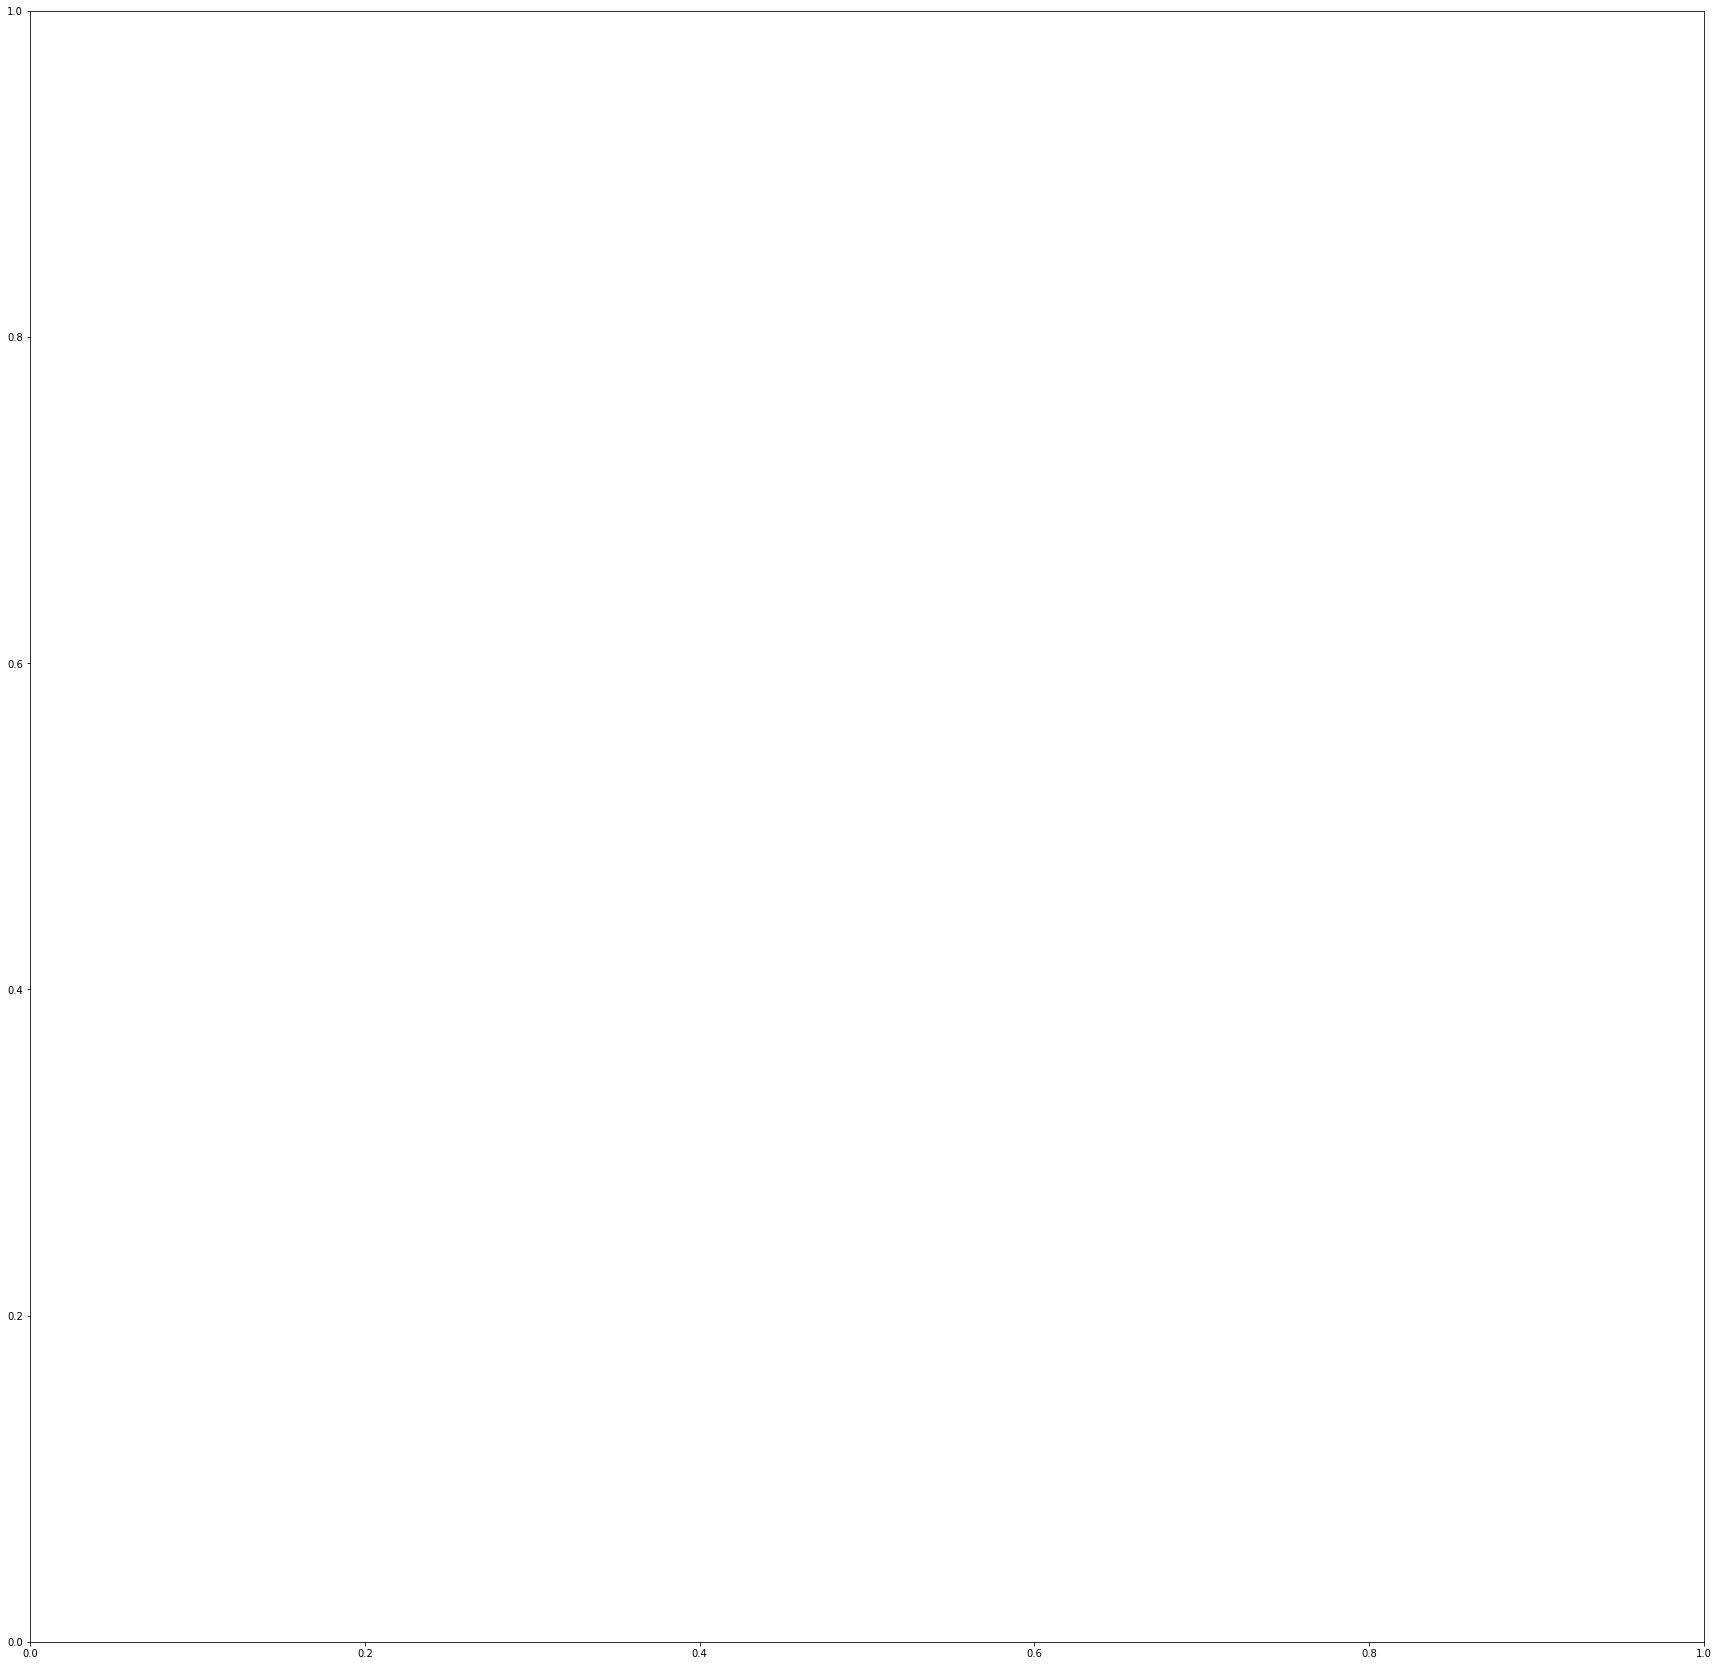

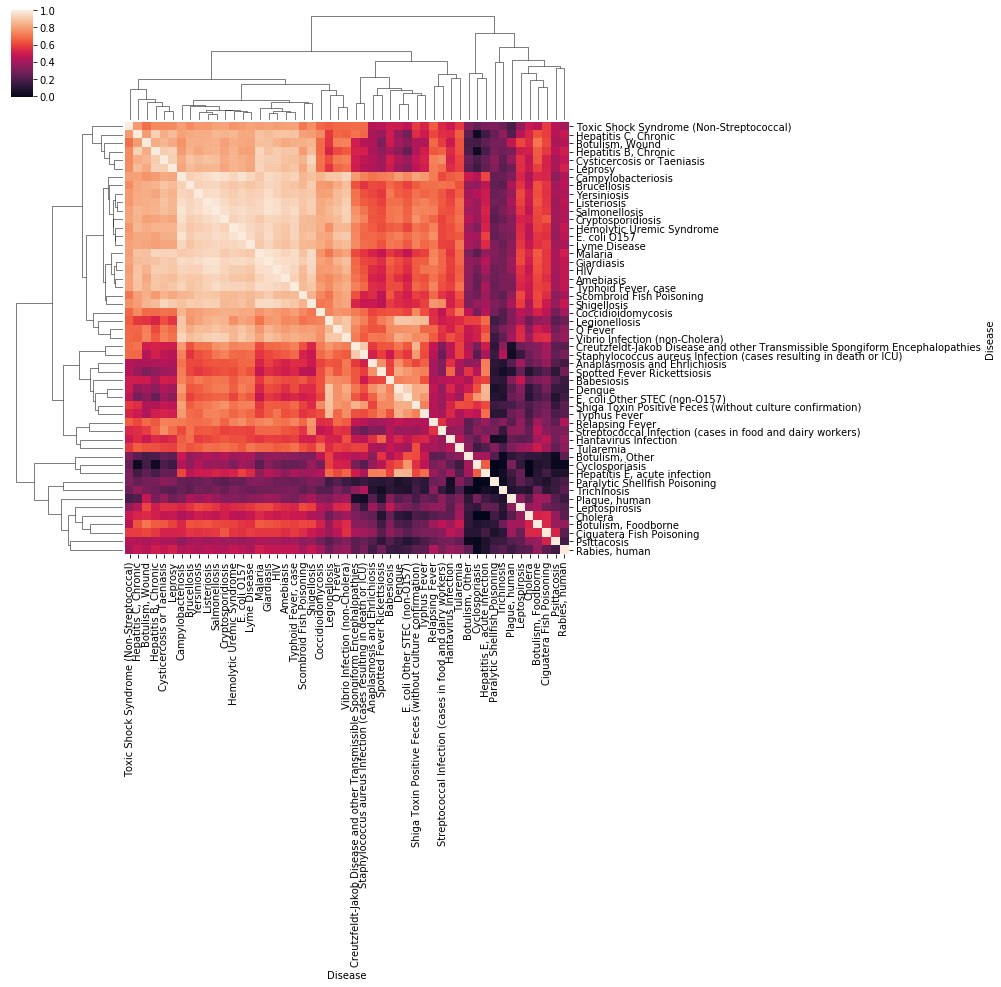

In [695]:
import seaborn as sns
plt.subplots(figsize=(30, 30))
plt.tick_params(axis='both', labelsize=10)
sns.clustermap(c6, 
            xticklabels=c5.columns.values,
            yticklabels=c5.columns.values)
# rotate x tick labels -45 degrees
# ,labelrotation=10

Matplotlib Correlation Matrix ColorGrid with c6

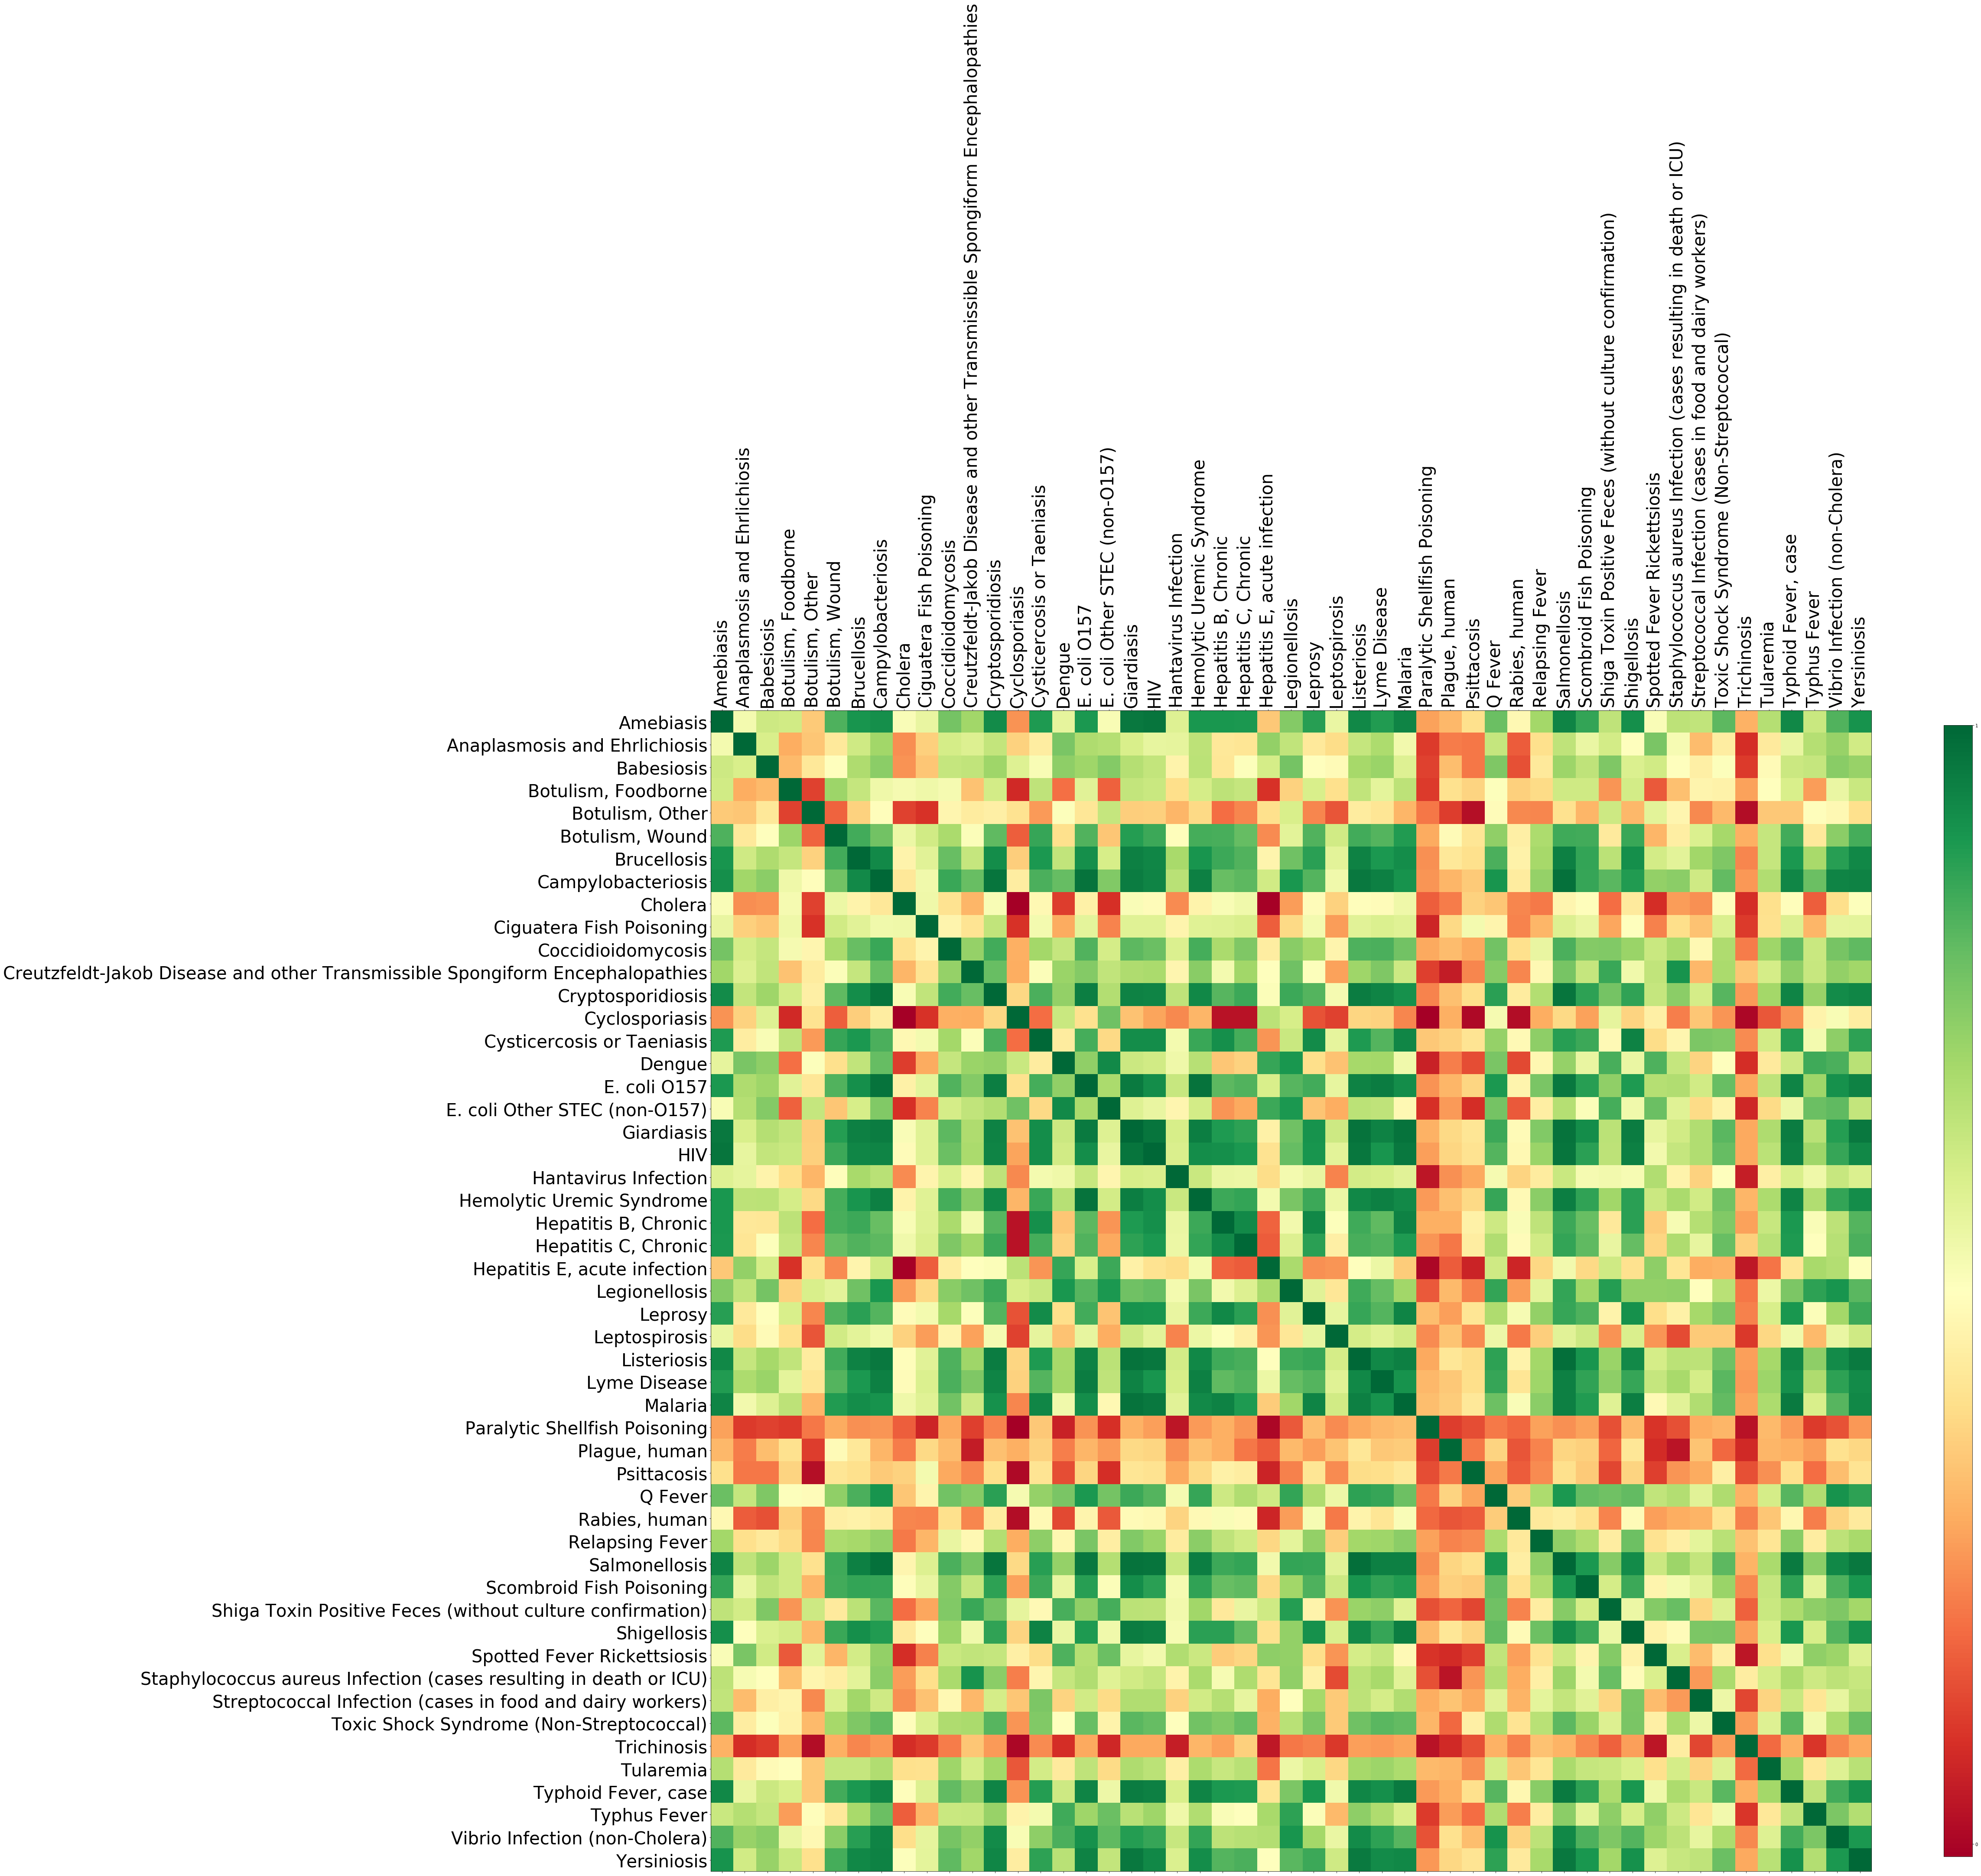

In [696]:
# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(60, 60))
ax.tick_params(axis='both', labelsize=40)
cax = ax.matshow(c6, cmap='RdYlGn')
plt.xticks(range(len(c6.columns)), c6.columns, rotation=90);
plt.yticks(range(len(c6.columns)), c6.columns);
    
# Add the colorbar legend
cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

# green is perfect positive correlation, red is perfect negative correlation

Matplotlib Correlation Matrix ColorMap with c6, Embedded Corr Values

In [697]:
from matplotlib import cm as cm

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

c6.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

# does this matrix have both column and row indexing ???

In [698]:
import scipy 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sns

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

4 Col Dendrogram Matrix with Dendrogram Plot of Corr Matrix c6

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [42.5, 42.5, 72.5, 72.5],
  [95.0, 95.0, 105.0, 105.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [100.0, 100.0, 123.75, 123.75],
  [57.5, 57.5, 111.875, 111.875],
  [12.5, 12.5, 84.6875, 84.6875],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [155.0, 155.0, 173.75, 173.75],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [245.0, 245.0, 263.75, 263.75],
  [213.75, 213.75, 254.375, 254.375],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [295.0, 295.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [307.5, 307.

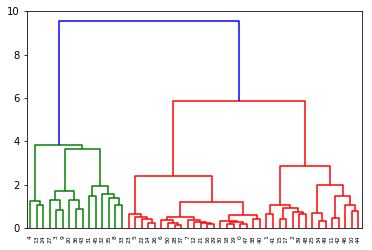

In [699]:
Z=linkage(c6,'ward')
# plt.subplots(figsize=(10, 10))
# plt.tick_params(axis='both', labelsize=20)
dendrogram(Z)

# HELP: color threshold and xtick, ytick labelling
# how do you get the labelling on the dendrogram
# give me a list to complete to finish off my capstone
# show stanford clearinghouse webscrape

# counted 52 branches and 52 lists (probably a miscount since the 
# matrix is 53x53, but then again it may be because of (n-1) in the linkage
# or dendrogram calculation before the return) with 4 elements each as 
# stated in the documentation

# the element values are large and greater than 1 floating points
# that would be the first set of lists then there's the second set
# of lists, which appear to be transformed and most likely based on the
# first set 

Looping for Optimal Number of Clusters in KMeans with Elbow Method Plot

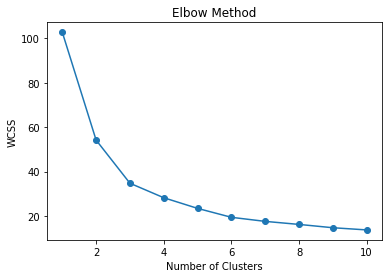

In [700]:
import sklearn.decomposition
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

wcss = []
for r in range(1,11):
    km=KMeans(n_clusters=r,random_state=0)
    km.fit(c6)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss,'-o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
# after 4 clusters, the slope flattens out

Linkage Matrix with 4 Cols

In [701]:
Z
# size 52

array([[28.        , 37.        ,  0.16134943,  2.        ],
       [18.        , 19.        ,  0.18020154,  2.        ],
       [ 0.        , 47.        ,  0.19776185,  2.        ],
       [16.        , 29.        ,  0.20105369,  2.        ],
       [50.        , 51.        ,  0.22621827,  3.        ],
       [21.        , 54.        ,  0.22734469,  3.        ],
       [14.        , 26.        ,  0.23108434,  2.        ],
       [12.        , 56.        ,  0.27291966,  4.        ],
       [52.        , 53.        ,  0.29786978,  4.        ],
       [34.        , 49.        ,  0.32729113,  2.        ],
       [30.        , 59.        ,  0.34538379,  5.        ],
       [ 6.        , 55.        ,  0.35131773,  4.        ],
       [ 7.        , 58.        ,  0.39034367,  5.        ],
       [15.        , 17.        ,  0.40425963,  2.        ],
       [22.        , 57.        ,  0.40808831,  3.        ],
       [38.        , 40.        ,  0.43685762,  2.        ],
       [11.        , 42.

Cluster Labels with fcluster on Linkage Matrix Z: clus_labs

In [702]:
# let's think about clustering the original binary matrix, disease portfolios 

# 4 clusters from elbow method
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from scipy.sparse import csr_matrix

# W = ward(c6)
# chose t=4 for 4 clusters from elbow method
# Z is c5, the corr matrix after the linkage function transformation
# from a cell above 
clus_labs = fcluster(Z, 4, criterion='distance')
clus_labs
# chose 4 but only returns 3 clusters

array([2, 3, 3, 1, 1, 2, 2, 2, 1, 1, 3, 3, 2, 1, 2, 3, 2, 3, 2, 2, 1, 2,
       2, 2, 1, 3, 2, 1, 2, 2, 2, 1, 1, 1, 3, 1, 1, 2, 2, 3, 2, 3, 3, 1,
       3, 1, 3, 2, 3, 3, 2], dtype=int32)

Disease Clusters as Lists for clus_labs 1,2,3: dis1, dis2, dis3

In [703]:
dis1 = c6.iloc[clus_labs==1,:].index
dis1

Index(['Botulism, Foodborne', 'Botulism, Other', 'Cholera',
       'Ciguatera Fish Poisoning', 'Cyclosporiasis', 'Hantavirus Infection',
       'Hepatitis E, acute infection', 'Leptospirosis',
       'Paralytic Shellfish Poisoning', 'Plague, human', 'Psittacosis',
       'Rabies, human', 'Relapsing Fever',
       'Streptococcal Infection (cases in food and dairy workers)',
       'Trichinosis'],
      dtype='object', name='Disease')

In [704]:
dis2 = c6.iloc[clus_labs==2,:].index
dis2

Index(['Amebiasis', 'Botulism, Wound', 'Brucellosis', 'Campylobacteriosis',
       'Cryptosporidiosis', 'Cysticercosis or Taeniasis', 'E. coli O157',
       'Giardiasis', 'HIV', 'Hemolytic Uremic Syndrome',
       'Hepatitis B, Chronic', 'Hepatitis C, Chronic', 'Leprosy',
       'Listeriosis', 'Lyme Disease', 'Malaria', 'Salmonellosis',
       'Scombroid Fish Poisoning', 'Shigellosis', 'Typhoid Fever, case',
       'Yersiniosis'],
      dtype='object', name='Disease')

In [705]:
dis3 = c6.iloc[clus_labs==3,:].index
dis3

Index(['Anaplasmosis and Ehrlichiosis', 'Babesiosis', 'Coccidioidomycosis',
       'Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies',
       'Dengue', 'E. coli Other STEC (non-O157)', 'Legionellosis', 'Q Fever',
       'Shiga Toxin Positive Feces (without culture confirmation)',
       'Spotted Fever Rickettsiosis',
       'Staphylococcus aureus Infection (cases resulting in death or ICU)',
       'Toxic Shock Syndrome (Non-Streptococcal)', 'Tularemia', 'Typhus Fever',
       'Vibrio Infection (non-Cholera)'],
      dtype='object', name='Disease')

Initializing Disease Cluster ID to 0 as DClus_ID//// Renaming dcn: dclus//// Sort by Population

In [706]:
# all diseases have been clustered
# cluster lists: dis1,dis2,dis3
dcn['DClus_ID'] = 0
dclus = dcn
dclus.sort_values('Population',ascending=False)

C:\Users\aufst\OneDrive\Music\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Year       County                                            Disease  \
7663    2015  Los Angeles                                            Anthrax   
50026   2015  Los Angeles                                         Giardiasis   
4286    2015  Los Angeles                      Anaplasmosis and Ehrlichiosis   
76477   2015  Los Angeles                                        Listeriosis   
119769  2015  Los Angeles                                          Tularemia   
11439   2015  Los Angeles                                Botulism, Foodborne   
34445   2015  Los Angeles                                  Cryptosporidiosis   
37735   2015  Los Angeles                         Cysticercosis or Taeniasis   
129931  2015  Los Angeles                     Vibrio Infection (non-Cholera)   
123709  2015  Los Angeles                                Typhoid Fever, case   
78543   2015  Los Angeles                                       Lyme Disease   
107751  2015  Los Angeles                        Spotted Fever Rickettsiosis   
19911   2015  Los Angeles                                        Brucellosis   
22420   2015  Los Angeles                                 Campylobacteriosis   
14765   2015  Los Angeles                                    Botulism, Other   
132491  2015  Los Angeles                                        Yersiniosis   
101072  2015  Los Angeles                           Scombroid Fish Poisoning   
9946    2015  Los Angeles                                         Babesiosis   
60490   2015  Los Angeles                               Hepatitis B, Chronic   
79612   2015  Los Angeles                                            Malaria   
44348   2015  Los Angeles                              Domoic Acid Poisoning   
68250   2015  Los Angeles                                      Legionellosis   
45206   2015  Los Angeles                                       E. coli O157   
70760   2015  Los Angeles                                            Leprosy   
87037   2015  Los Angeles                                      Plague, human   
98975   2015  Los Angeles                                      Salmonellosis   
126261  2015  Los Angeles                                       Typhus Fever   
114050  2015  Los Angeles  Streptococcal Infection (cases in food and dai...   
65832   2015  Los Angeles                       Hepatitis E, acute infection   
55060   2015  Los Angeles                               Hantavirus Infection   
...      ...          ...                                                ...   
79203   2015       Alpine                                       Lyme Disease   
56387   2015       Alpine                               Hantavirus Infection   
111516  2015       Alpine  Staphylococcus aureus Infection (cases resulti...   
29806   2015       Alpine                                 Coccidioidomycosis   
13501   2015       Alpine                                    Botulism, Other   
57732   2015       Alpine                          Hemolytic Uremic Syndrome   
33720   2015       Alpine                                  Cryptosporidiosis   
103405  2015       Alpine  Shiga Toxin Positive Feces (without culture co...   
126897  2015       Alpine                                       Typhus Fever   
24534   2015       Alpine                                            Cholera   
19459   2015       Alpine                                        Brucellosis   
112084  2015       Alpine  Streptococcal Infection (cases in food and dai...   
495     2015       Alpine                                          Amebiasis   
117131  2015       Alpine                                        Trichinosis   
98723   2015       Alpine                                      Salmonellosis   
85712   2015       Alpine                                      Plague, human   
16513   2015       Alpine                                    Botulism, Wound   
43329   2015       Alpine                              Domoic Acid Poisoning   
72904   

Reassigning Values of DClus_ID Col to Cluster Label IDs

In [707]:
for idx, re in dclus.iterrows():
    if re.Disease in dis1:
        dclus.at[idx, 'DClus_ID'] = 1
    elif re.Disease in dis2:
        dclus.at[idx, 'DClus_ID'] = 2
    elif re.Disease in dis3:
        dclus.at[idx, 'DClus_ID'] = 3
    else:
        dclus.at[idx, 'DClus_ID'] = 999
# VICTORY        
# cluster 999 is for zero counts

In [708]:
dclus.sort_values(['Year','County'],inplace=True)
# fix duplicates 

C:\Users\aufst\OneDrive\Music\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [709]:
dclus[dclus['Disease']=='Dengue'].head()

Year     County Disease  Count  Population  DClus_ID
39907  2001    Alameda  Dengue      3     1465564         3
39891  2001     Alpine  Dengue      0        1237         3
39887  2001     Amador  Dengue      0       35784         3
39779  2001      Butte  Dengue      0      205730         3
39763  2001  Calaveras  Dengue      0       41428         3

Set Index of dclus to County and Year, Renaming to reindclus

In [710]:
reindclus = dclus.set_index(['County','Year'])
reclus = reindclus.drop('Population',axis=1)
check = reclus.sort_values(['Year','Disease','County'])
check.head(20)

Disease  Count  DClus_ID
County       Year                            
Alameda      2001  Amebiasis     16         2
Alpine       2001  Amebiasis      0         2
Amador       2001  Amebiasis      0         2
Butte        2001  Amebiasis      2         2
Calaveras    2001  Amebiasis      0         2
Colusa       2001  Amebiasis      0         2
Contra Costa 2001  Amebiasis      5         2
Del Norte    2001  Amebiasis      0         2
El Dorado    2001  Amebiasis      1         2
Fresno       2001  Amebiasis      6         2
Glenn        2001  Amebiasis      0         2
Humboldt     2001  Amebiasis      2         2
Imperial     2001  Amebiasis      0         2
Inyo         2001  Amebiasis      0         2
Kern         2001  Amebiasis      4         2
Kings        2001  Amebiasis      0         2
Lake         2001  Amebiasis      0         2
Lassen       2001  Amebiasis      0         2
Los Angeles  2001  Amebiasis    147         2
Madera       2001  Amebiasis      0         2

In [711]:
dclus2007 = dclus[dclus['Year']==2007].sort_values(['County','Disease'])
dclus2007[dclus2007['DClus_ID']==1].sort_values('Count',ascending=False)
dcs2007 = dclus2007.drop('Population',axis=1)
dcs2007.head(20)

# clusterID 1, has a very low count over all counties, with max count 10
# for strept infect
# list for max clusterID of each county 
# compute max cluster distribution
# the average is the rate


Year   County                                            Disease  \
2102   2007  Alameda                                          Amebiasis   
4618   2007  Alameda                      Anaplasmosis and Ehrlichiosis   
6221   2007  Alameda                                            Anthrax   
8680   2007  Alameda                                         Babesiosis   
13215  2007  Alameda                                Botulism, Foodborne   
14124  2007  Alameda                                    Botulism, Other   
16017  2007  Alameda                                    Botulism, Wound   
19341  2007  Alameda                                        Brucellosis   
22231  2007  Alameda                                 Campylobacteriosis   
24375  2007  Alameda                                            Cholera   
27020  2007  Alameda                           Ciguatera Fish Poisoning   
31349  2007  Alameda                                 Coccidioidomycosis   
32767  2007  Alameda  Creutzfeldt-Jakob Disease and other Transmissi...   
33752  2007  Alameda                                  Cryptosporidiosis   
37674  2007  Alameda                         Cysticercosis or Taeniasis   
39950  2007  Alameda                                             Dengue   
43075  2007  Alameda                              Domoic Acid Poisoning   
45161  2007  Alameda                                       E. coli O157   
47821  2007  Alameda                      E. coli Other STEC (non-O157)   
51328  2007  Alameda                                         Giardiasis   

       Count  DClus_ID  
2102       9         2  
4618       0         3  
6221       0       999  
8680       0         3  
13215      0         1  
14124      0         1  
16017      2         2  
19341      3         2  
22231    363         2  
24375      1         1  
27020      0         1  
31349     25         3  
32767      4         3  
33752     12         2  
37674      1         2  
39950      0         3  
43075      0       999  
45161     23         2  
47821      0         3  
51328     99         2

Summing Over Time Series by Count Col and Grouping by County and DClus_ID

In [712]:
dclus.groupby(['County','DClus_ID'])['Count'].sum()
# remove cluster 999, county california(county removed)
# this gives me the sum of all counts over time, so must retrieve by dataframe

# THIS DATAFRAME WILL BE INDEPENDENT OF TIME BC ALL ELMTS HAVE BEEN AGGREGATED
# county, clusID, and sum
# same with mean(), all in one dataframe
# ie County    DClus_ID   CountSum    CountMean
#    alameda   1          30          .146
#    alameda   2          41968       133.231
#    alameda   3          754         3.751
# bar plot? time series? ts not possible


County        DClus_ID
Alameda       1              30
              2           41968
              3             754
              999             0
Alpine        1               0
              2               6
              3               0
              999             0
Amador        1               2
              2            1852
              3              38
              999             0
Butte         1               9
              2            5481
              3              58
              999             0
Calaveras     1               5
              2             984
              3              22
              999             0
Colusa        1               1
              2             207
              3              14
              999             0
Contra Costa  1              24
              2           18826
              3             679
              999             0
Del Norte     1               5
              2            2925
                 

Aggregating with Sum and Mean Over TS by Count and Grouping by County and (DClus_ID) for Cluster 1,2,3

In [713]:
drpop = dclus[dclus.DClus_ID ==1].drop('Population',axis=1)
clus1 = drpop.groupby(['County','DClus_ID']).Count.agg(['sum','mean'])
# clus1 = drpop.groupby('County').Count.agg(['sum','mean'])/// another option
clus1 = clus1.sort_values('mean',ascending=False)
clus1.head(10)

sum      mean
County       DClus_ID               
Los Angeles  1         117  0.570732
Santa Clara  1          66  0.321951
San Diego    1          39  0.190244
Sacramento   1          36  0.175610
Humboldt     1          33  0.160976
San Mateo    1          31  0.151220
Alameda      1          30  0.146341
Contra Costa 1          24  0.117073
Mono         1          21  0.102439
Imperial     1          20  0.097561

Renaming sum and mean to CtSum and CtMean(Count Sum, Count Mean)

In [714]:
clus1 = clus1.rename({'sum': 'CtSum', 'mean': 'CtMean'}, axis='columns')
clus1.head(10)

CtSum    CtMean
County       DClus_ID                 
Los Angeles  1           117  0.570732
Santa Clara  1            66  0.321951
San Diego    1            39  0.190244
Sacramento   1            36  0.175610
Humboldt     1            33  0.160976
San Mateo    1            31  0.151220
Alameda      1            30  0.146341
Contra Costa 1            24  0.117073
Mono         1            21  0.102439
Imperial     1            20  0.097561

In [715]:
drpop2 = dclus[dclus.DClus_ID ==2].drop('Population',axis=1)
clus2 = drpop2.groupby(['County','DClus_ID']).Count.agg(['sum','mean'])
clus2 = clus2.sort_values('mean',ascending=False)
clus2.head(10)

sum        mean
County         DClus_ID                    
Los Angeles    2         266116  844.812698
San Diego      2          76817  243.863492
Santa Clara    2          53167  168.784127
Orange         2          45268  143.707937
San Francisco  2          42387  134.561905
Alameda        2          41968  133.231746
San Bernardino 2          40909  129.869841
Sacramento     2          35098  111.422222
Riverside      2          33071  104.987302
Kern           2          32772  104.038095

In [716]:
clus2 = clus2.rename({'sum': 'CtSum', 'mean': 'CtMean'}, axis='columns')
clus2.head(10)

CtSum      CtMean
County         DClus_ID                    
Los Angeles    2         266116  844.812698
San Diego      2          76817  243.863492
Santa Clara    2          53167  168.784127
Orange         2          45268  143.707937
San Francisco  2          42387  134.561905
Alameda        2          41968  133.231746
San Bernardino 2          40909  129.869841
Sacramento     2          35098  111.422222
Riverside      2          33071  104.987302
Kern           2          32772  104.038095

In [717]:
drpop3 = dclus[dclus.DClus_ID ==3].drop('Population',axis=1)
clus3 = drpop3.groupby(['County','DClus_ID']).Count.agg(['sum','mean'])
clus3 = clus3.sort_values('mean',ascending=False)
clus3.head(10)

sum       mean
County          DClus_ID                  
Kern            3         19905  99.029851
Los Angeles     3          6431  31.995025
Fresno          3          5468  27.203980
San Diego       3          2448  12.179104
Kings           3          2326  11.572139
Tulare          3          2301  11.447761
Orange          3          1853   9.218905
San Luis Obispo 3          1425   7.089552
Riverside       3          1146   5.701493
San Bernardino  3           935   4.651741

In [718]:
clus3 = clus3.rename({'sum': 'CtSum', 'mean': 'CtMean'}, axis='columns')
clus3.head(10)

CtSum     CtMean
County          DClus_ID                  
Kern            3         19905  99.029851
Los Angeles     3          6431  31.995025
Fresno          3          5468  27.203980
San Diego       3          2448  12.179104
Kings           3          2326  11.572139
Tulare          3          2301  11.447761
Orange          3          1853   9.218905
San Luis Obispo 3          1425   7.089552
Riverside       3          1146   5.701493
San Bernardino  3           935   4.651741

In [719]:
#check.groupby(['County','DClus_ID'])['Count'].sum()
#runs

In [720]:
dclus.groupby(['County','DClus_ID'])['Count'].mean()
# create a list of lists, where each list contains 3 elmts: max clusID, max val,
# and county

County        DClus_ID
Alameda       1             0.146341
              2           133.231746
              3             3.751244
              999           0.000000
Alpine        1             0.000000
              2             0.019048
              3             0.000000
              999           0.000000
Amador        1             0.009756
              2             5.879365
              3             0.189055
              999           0.000000
Butte         1             0.043902
              2            17.400000
              3             0.288557
              999           0.000000
Calaveras     1             0.024390
              2             3.123810
              3             0.109453
              999           0.000000
Colusa        1             0.004878
              2             0.657143
              3             0.069652
              999           0.000000
Contra Costa  1             0.117073
              2            59.765079
              3

In [721]:
#check.groupby(['County','DClus_ID'])['Count'].mean()
#runs
zonemat.head(20)

Disease       Amebiasis  Anaplasmosis and Ehrlichiosis  Babesiosis  \
County  Year                                                         
Alameda 2001       16.0                            0.0         0.0   
        2002        9.0                            0.0         0.0   
        2003        6.0                            0.0         0.0   
        2004        7.0                            1.0         0.0   
        2005        9.0                            0.0         0.0   
        2006        6.0                            0.0         0.0   
        2007        9.0                            0.0         0.0   
        2008        9.0                            0.0         1.0   
        2009       15.0                            0.0         1.0   
        2010       24.0                            0.0         0.0   
        2011       21.0                            0.0         1.0   
        2012       27.0                            0.0         0.0   
        2013       12.0                            0.0         0.0   
        2014       12.0                            0.0         0.0   
        2015       65.0                            0.0         2.0   
Alpine  2001        0.0                            0.0         0.0   
        2002        0.0                            0.0         0.0   
        2003        0.0                            0.0         0.0   
        2004        0.0                            0.0         0.0   
        2005        0.0                            0.0         0.0   

Disease       Botulism, Foodborne  Botulism, Other  Botulism, Wound  \
County  Year                                                          
Alameda 2001                  0.0              0.0              0.0   
        2002                  0.0              0.0              1.0   
        2003                  0.0              0.0              5.0   
        2004                  0.0              0.0              1.0   
        2005                  0.0              0.0              1.0   
        2006                  0.0              0.0              8.0   
        2007                  0.0              0.0              2.0   
        2008                  1.0              0.0              1.0   
        2009                  0.0              0.0              6.0   
        2010                  0.0              0.0              3.0   
        2011                  0.0              0.0              1.0   
        2012                  0.0              0.0              0.0   
        2013                  0.0              0.0              0.0   
        2014                  0.0              0.0              2.0   
        2015                  0.0              0.0              1.0   
Alpine  2001                  0.0              0.0              0.0   
        2002                  0.0              0.0              0.0   
        2003                  0.0              0.0              0.0   
        2004                  0.0              0.0              0.0   
        2005                  0.0              0.0              0.0   

Disease       Brucellosis  Campylobacteriosis  Cholera  \
County  Year                                             
Alameda 2001          1.0               252.0      0.0   
        2002          1.0               359.0      0.0   
        2003          0.0               300.0      0.0   
        2004          1.0               310.0      0.0   
        2005          1.0               326.0      0.0   
        2006          3.0               317.0      0.0   
        2007          3.0               363.0      1.0   
        2008          0.0               328.0      0.0   
        2009          1.0               348.0      0.0   
        2010          0.0               357.0      0.0   
        2011          1.0               360.0      0.0   
        2012          0.0               417.0      0.0   
        2013          0.0               409.0      0.0   
        2014          0.0 

All Counties in Disease Porfolio Prepped for Clustering, Multi-Indexed by Year -> 2001//// note: cluster over 2013, 2014, 2015

In [722]:
# dataframes of interest dis_prep, indicmat, zonemat
cl2013 = zonemat.loc[(slice(None),2013),:]
cl2014 = zonemat.loc[(slice(None),2014),:]
cl2015 = zonemat.loc[(slice(None),2015),:]
cl2013.head(10)
# multilevel indexing slice(None) for all counties, list for a variety while taking into account 
# the datatype for these indices, ie. year -> int
# 58 rows -> 58 counties 

Disease            Amebiasis  Anaplasmosis and Ehrlichiosis  Babesiosis  \
County       Year                                                         
Alameda      2013       12.0                            0.0         0.0   
Alpine       2013        0.0                            0.0         0.0   
Amador       2013        0.0                            0.0         0.0   
Butte        2013        3.0                            0.0         0.0   
Calaveras    2013        0.0                            0.0         0.0   
California   2013      244.0                           11.0         3.0   
Colusa       2013        0.0                            0.0         0.0   
Contra Costa 2013       13.0                            1.0         0.0   
Del Norte    2013        0.0                            0.0         0.0   
El Dorado    2013        0.0                            0.0         0.0   

Disease            Botulism, Foodborne  Botulism, Other  Botulism, Wound  \
County       Year                                                          
Alameda      2013                  0.0              0.0              0.0   
Alpine       2013                  0.0              0.0              0.0   
Amador       2013                  0.0              0.0              0.0   
Butte        2013                  0.0              0.0              0.0   
Calaveras    2013                  0.0              0.0              0.0   
California   2013                  1.0              0.0              9.0   
Colusa       2013                  0.0              0.0              0.0   
Contra Costa 2013                  0.0              0.0              0.0   
Del Norte    2013                  0.0              0.0              0.0   
El Dorado    2013                  0.0              0.0              0.0   

Disease            Brucellosis  Campylobacteriosis  Cholera  \
County       Year                                             
Alameda      2013          0.0               409.0      0.0   
Alpine       2013          0.0                 0.0      0.0   
Amador       2013          0.0                 6.0      0.0   
Butte        2013          1.0                38.0      0.0   
Calaveras    2013          0.0                 6.0      0.0   
California   2013         22.0              7496.0      0.0   
Colusa       2013          0.0                 9.0      0.0   
Contra Costa 2013          0.0               260.0      0.0   
Del Norte    2013          0.0                 1.0      0.0   
El Dorado    2013          0.0                32.0      0.0   

Disease            Ciguatera Fish Poisoning  ...  Spotted Fever Rickettsiosis  \
County       Year                            ...                                
Alameda      2013                       0.0  ...                          1.0   
Alpine       2013                       0.0  ...                          0.0   
Amador       2013                       0.0  ...                          0.0   
Butte        2013                       0.0  ...                          0.0   
Calaveras    2013                       0.0  ...                          0.0   
California   2013                       2.0  ...                         15.0   
Colusa       2013                       0.0  ...                          0.0   
Contra Costa 2013                       0.0  ...                          0.0   
Del Norte    2013                       0.0  ...                          0.0   
El Dorado    2013                       0.0  ...                          0.0   

Disease            Staphylococcus aureus Infection (cases resulting in death or ICU)  \
County       Year                                                                      
Alameda      2013                                                0.0                   
Alpine       2013                                                0.0                   
Amador       2013                                                0.0                   
Butte        201

Corr Matrices for Linkage Function and FCluster Method

In [723]:
# instructions: corr matrix c6 derived from disease portfolio zonemat(all time steps&counties), compute corr 
# matrix with cl2013,..., then compute linkage parameters, R,S,T, then compute cluster labels with fcluster
# fcluster
corr2013 = cl2013.corr().fillna(0)
corr2014 = cl2014.corr().fillna(0)
corr2015 = cl2015.corr().fillna(0)
# corr matrices
# subset dclus from above, rename dclus1,dclus2,dclus for the purpose of this 
# clustering task

R=linkage(corr2013,'ward')
S=linkage(corr2014,'ward')
T=linkage(corr2015,'ward')
# linkage matrices for clustering

clabs2013 = fcluster(R, 4, criterion='distance')
clabs2014 = fcluster(S, 4, criterion='distance')
clabs2015 = fcluster(T, 4, criterion='distance')
# cluster labels 

In [724]:
clabs2013 

array([2, 2, 3, 3, 1, 2, 2, 2, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 3,
       2, 3, 3, 2, 3, 2, 2], dtype=int32)

Cluster Objects for 2013

In [725]:
d1 = corr2013.iloc[clabs2013==1,:].index
d2 = corr2013.iloc[clabs2013==2,:].index
d3 = corr2013.iloc[clabs2013==3,:].index

Subsetting dcn for 2013 

In [726]:
dcn13 = dcn[dcn['Year'] == 2013]
dcn13['DClus_ID'] = 0
dcn13.sort_values('Population',ascending=False)
dcn13.head(10)

C:\Users\aufst\OneDrive\Music\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Year   County                        Disease  Count  Population  \
2345   2013  Alameda                      Amebiasis     12     1575797   
4416   2013  Alameda  Anaplasmosis and Ehrlichiosis      0     1575797   
7436   2013  Alameda                        Anthrax      0     1575797   
10396  2013  Alameda                     Babesiosis      0     1575797   
12825  2013  Alameda            Botulism, Foodborne      0     1575797   
13288  2013  Alameda                Botulism, Other      0     1575797   
16211  2013  Alameda                Botulism, Wound      0     1575797   
18912  2013  Alameda                    Brucellosis      0     1575797   
22161  2013  Alameda             Campylobacteriosis    409     1575797   
26462  2013  Alameda                        Cholera      0     1575797   

       DClus_ID  
2345          0  
4416          0  
7436          0  
10396         0  
12825         0  
13288         0  
16211         0  
18912         0  
22161         0  
26462         0

In [727]:
# step 3: reassign values of clus_id col
# clabs2013 contains labs 1,2,3 in d1,d2,d3
for idx, re in dcn13.iterrows():
    if re.Disease in d1:
        dcn13.at[idx, 'DClus_ID'] = 1
    elif re.Disease in d2:
        dcn13.at[idx, 'DClus_ID'] = 2
    elif re.Disease in d3:
        dcn13.at[idx, 'DClus_ID'] = 3
    else:
        dcn13.at[idx, 'DClus_ID'] = 999
# 999 bc 'nan' string unacceptable

In [728]:
dcn13.head(10)

Year   County                        Disease  Count  Population  \
2345   2013  Alameda                      Amebiasis     12     1575797   
4416   2013  Alameda  Anaplasmosis and Ehrlichiosis      0     1575797   
7436   2013  Alameda                        Anthrax      0     1575797   
10396  2013  Alameda                     Babesiosis      0     1575797   
12825  2013  Alameda            Botulism, Foodborne      0     1575797   
13288  2013  Alameda                Botulism, Other      0     1575797   
16211  2013  Alameda                Botulism, Wound      0     1575797   
18912  2013  Alameda                    Brucellosis      0     1575797   
22161  2013  Alameda             Campylobacteriosis    409     1575797   
26462  2013  Alameda                        Cholera      0     1575797   

       DClus_ID  
2345          2  
4416          2  
7436        999  
10396         3  
12825         3  
13288         1  
16211         2  
18912         2  
22161         2  
26462         1

Courtesy DataFrames 2013, Sum, Mean of Counts 

In [729]:
dcn13[dcn13.DClus_ID ==1].head(10)
# disease batch from cluster 1 in dcn13 for year 2013 appears to have zero 
# counts, zero prevalence

Year   County                        Disease  Count  Population  \
13288  2013  Alameda                Botulism, Other      0     1575797   
26462  2013  Alameda                        Cholera      0     1575797   
84403  2013  Alameda  Paralytic Shellfish Poisoning      0     1575797   
86685  2013  Alameda                  Plague, human      0     1575797   
94458  2013  Alameda                  Rabies, human      0     1575797   
15620  2013   Alpine                Botulism, Other      0        1164   
24510  2013   Alpine                        Cholera      0        1164   
82452  2013   Alpine  Paralytic Shellfish Poisoning      0        1164   
85760  2013   Alpine                  Plague, human      0        1164   
94750  2013   Alpine                  Rabies, human      0        1164   

       DClus_ID  
13288         1  
26462         1  
84403         1  
86685         1  
94458         1  
15620         1  
24510         1  
82452         1  
85760         1  
94750         1

In [730]:
# step 3.5: optional, add ctsum and ctmean cols
cute = dcn13[dcn13.DClus_ID ==1].drop('Population',axis=1)
ctsy1 = cute.groupby(['County','DClus_ID']).Count.agg(['sum','mean'])
# clus1 = drpop.groupby('County').Count.agg(['sum','mean'])/// another option
ctsy1 = ctsy1.sort_values('mean',ascending=False)
ctsy1.head()
# no sum or mean even though there are counts 

sum  mean
County     DClus_ID           
Alameda    1           0     0
Santa Cruz 1           0     0
Plumas     1           0     0
Riverside  1           0     0
Sacramento 1           0     0

In [731]:
# step 3.5: optional, add ctsum and ctmean cols
cute2 = dcn13[dcn13.DClus_ID ==2].drop('Population',axis=1)
ctsy2 = cute2.groupby(['County','DClus_ID']).Count.agg(['sum','mean'])
ctsy2 = ctsy2.sort_values('mean',ascending=False)
ctsy2.head()

sum        mean
County        DClus_ID                   
Los Angeles   2         15170  459.696970
San Diego     2          4076  123.515152
Santa Clara   2          3547  107.484848
San Francisco 2          3054   92.545455
Orange        2          2893   87.666667

In [732]:
# step 3.5: optional, add ctsum and ctmean cols
cute3 = dcn13[dcn13.DClus_ID ==3].drop('Population',axis=1)
ctsy3 = cute3.groupby(['County','DClus_ID']).Count.agg(['sum','mean'])
ctsy3 = ctsy3.sort_values('mean',ascending=False)
ctsy3.head()

sum        mean
County      DClus_ID                  
Kern        3         1656  127.384615
Los Angeles 3          420   32.307692
Fresno      3          311   23.923077
Tulare      3          114    8.769231
Orange      3          107    8.230769

In [733]:
clabs2014

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2], dtype=int32)

In [734]:
di1 = corr2014.iloc[clabs2014==1,:].index
di2 = corr2014.iloc[clabs2014==2,:].index
# di3 = corr2014.iloc[clabs2014==3,:].index

In [735]:
dcn14 = dcn[dcn['Year'] == 2014]
dcn14['DClus_ID'] = 0
dcn14 = dcn14.sort_values('Population',ascending=False)
dcn14.head()

C:\Users\aufst\OneDrive\Music\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Year       County                        Disease  Count  Population  \
3280   2014  Los Angeles  Anaplasmosis and Ehrlichiosis      0    10124684   
66787  2014  Los Angeles                  Legionellosis    145    10124684   
73667  2014  Los Angeles                  Leptospirosis      0    10124684   
74519  2014  Los Angeles                    Listeriosis     38    10124684   
77616  2014  Los Angeles                   Lyme Disease      7    10124684   

       DClus_ID  
3280          0  
66787         0  
73667         0  
74519         0  
77616         0

In [736]:
# step 3: reassign values of clus_id col
# clabs2014 contains labs 1,2,3 in d1,d2,d3
for idx, re in dcn14.iterrows():
    if re.Disease in di1:
        dcn14.at[idx, 'DClus_ID'] = 1
    elif re.Disease in di2:
        dcn14.at[idx, 'DClus_ID'] = 2
    else:
        dcn14.at[idx, 'DClus_ID'] = 999
# 999 bc 'nan' string unacceptable

In [737]:
# step 3.5: optional, add ctsum and ctmean cols
cutsy1 = dcn14[dcn14.DClus_ID ==1].drop('Population',axis=1)
cty1 = cutsy1.groupby(['County','DClus_ID']).Count.agg(['sum','mean'])
# clus1 = drpop.groupby('County').Count.agg(['sum','mean'])/// another option
cty1 = cty1.sort_values('mean',ascending=False)
cty1.head()

sum  mean
County     DClus_ID           
Alameda    1           0     0
Santa Cruz 1           0     0
Plumas     1           0     0
Riverside  1           0     0
Sacramento 1           0     0

In [738]:
# step 3.5: optional, add ctsum and ctmean cols
cutsy2 = dcn14[dcn14.DClus_ID ==2].drop('Population',axis=1)
cty2 = cutsy2.groupby(['County','DClus_ID']).Count.agg(['sum','mean'])
cty2 = cty2.sort_values('mean',ascending=False)
cty2.head()

sum        mean
County        DClus_ID                  
Los Angeles   2         6718  159.952381
San Diego     2         2745   65.357143
Orange        2         1592   37.904762
Kern          2         1539   36.642857
San Francisco 2         1489   35.452381

In [739]:
clabs2015

array([2, 3, 2, 3, 3, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       1, 1, 2, 2, 3, 3, 2, 2, 2, 1, 3, 1, 2, 1, 3, 2, 2, 2, 2, 2, 2, 3,
       2, 1, 3, 2, 3, 2, 2], dtype=int32)

In [740]:
dii1 = corr2015.iloc[clabs2015==1,:].index
dii2 = corr2015.iloc[clabs2015==2,:].index
dii3 = corr2015.iloc[clabs2015==3,:].index

In [741]:
dcn15 = dcn[dcn['Year'] == 2015]
dcn15['DClus_ID'] = 0
dcn15 = dcn15.sort_values('Population',ascending=False)
dcn15.head()

C:\Users\aufst\OneDrive\Music\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Year       County                        Disease  Count  Population  \
4286   2015  Los Angeles  Anaplasmosis and Ehrlichiosis      0    10185487   
68250  2015  Los Angeles                  Legionellosis    176    10185487   
73746  2015  Los Angeles                  Leptospirosis      0    10185487   
76477  2015  Los Angeles                    Listeriosis     38    10185487   
78543  2015  Los Angeles                   Lyme Disease      4    10185487   

       DClus_ID  
4286          0  
68250         0  
73746         0  
76477         0  
78543         0

In [742]:
# step 3: reassign values of clus_id col
# clabs2015 contains labs 1,2,3 in d1,d2,d3
for idx, re in dcn15.iterrows():
    if re.Disease in dii1:
        dcn15.at[idx, 'DClus_ID'] = 1
    elif re.Disease in dii2:
        dcn15.at[idx, 'DClus_ID'] = 2
    elif re.Disease in dii3:
        dcn15.at[idx, 'DClus_ID'] = 3
    else:
        dcn15.at[idx, 'DClus_ID'] = 999
# 999 bc 'nan' string unacceptable

In [743]:
# step 3.5: optional, add ctsum and ctmean cols
cutt1 = dcn15[dcn15.DClus_ID ==1].drop('Population',axis=1)
cy1 = cutt1.groupby(['County','DClus_ID']).Count.agg(['sum','mean'])
# clus1 = drpop.groupby('County').Count.agg(['sum','mean'])/// another option
cy1 = cy1.sort_values('mean',ascending=False)
cy1.head()

sum  mean
County     DClus_ID           
Alameda    1           0     0
Santa Cruz 1           0     0
Plumas     1           0     0
Riverside  1           0     0
Sacramento 1           0     0

In [744]:
# step 3.5: optional, add ctsum and ctmean cols
cutt2 = dcn15[dcn15.DClus_ID ==2].drop('Population',axis=1)
cy2 = cutt2.groupby(['County','DClus_ID']).Count.agg(['sum','mean'])
cy2 = cy2.sort_values('mean',ascending=False)
cy2.head()

sum       mean
County      DClus_ID                 
Los Angeles 2         7024  219.50000
San Diego   2         2594   81.06250
Orange      2         1807   56.46875
Kern        2         1714   53.56250
Alameda     2         1601   50.03125

In [745]:
# step 3.5: optional, add ctsum and ctmean cols
cutt3 = dcn15[dcn15.DClus_ID ==3].drop('Population',axis=1)
cy3 = cutt3.groupby(['County','DClus_ID']).Count.agg(['sum','mean'])
cy3 = cy3.sort_values('mean',ascending=False)
cy3.head()

sum      mean
County      DClus_ID               
Los Angeles 3          67  5.583333
Orange      3          16  1.333333
San Diego   3          13  1.083333
Tulare      3           5  0.416667
Santa Clara 3           4  0.333333

Merging DataFrames, Cluster with Economic Factors -> Relocated to Cell 451 Near Bottom 

In [746]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from scipy.sparse import csr_matrix
import numpy as np
# W = ward(c5)

# c_labs = fcluster(c5, 4, criterion='distance')
# needs 4 cols

Agglomerative Clustering Using Corr Matrix c6 with Clustering Labels: clustering

In [747]:
from sklearn.cluster import AgglomerativeClustering

X = c6.values

# error of the future: .as_matrix()
clustering = AgglomerativeClustering(n_clusters=4).fit(X)

In [748]:
clustering.labels_

array([2, 1, 1, 0, 3, 2, 2, 2, 0, 0, 1, 1, 2, 3, 2, 1, 2, 1, 2, 2, 0, 2,
       2, 2, 3, 1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 1, 1, 2], dtype=int64)

PLT Corr Matrix Color Map

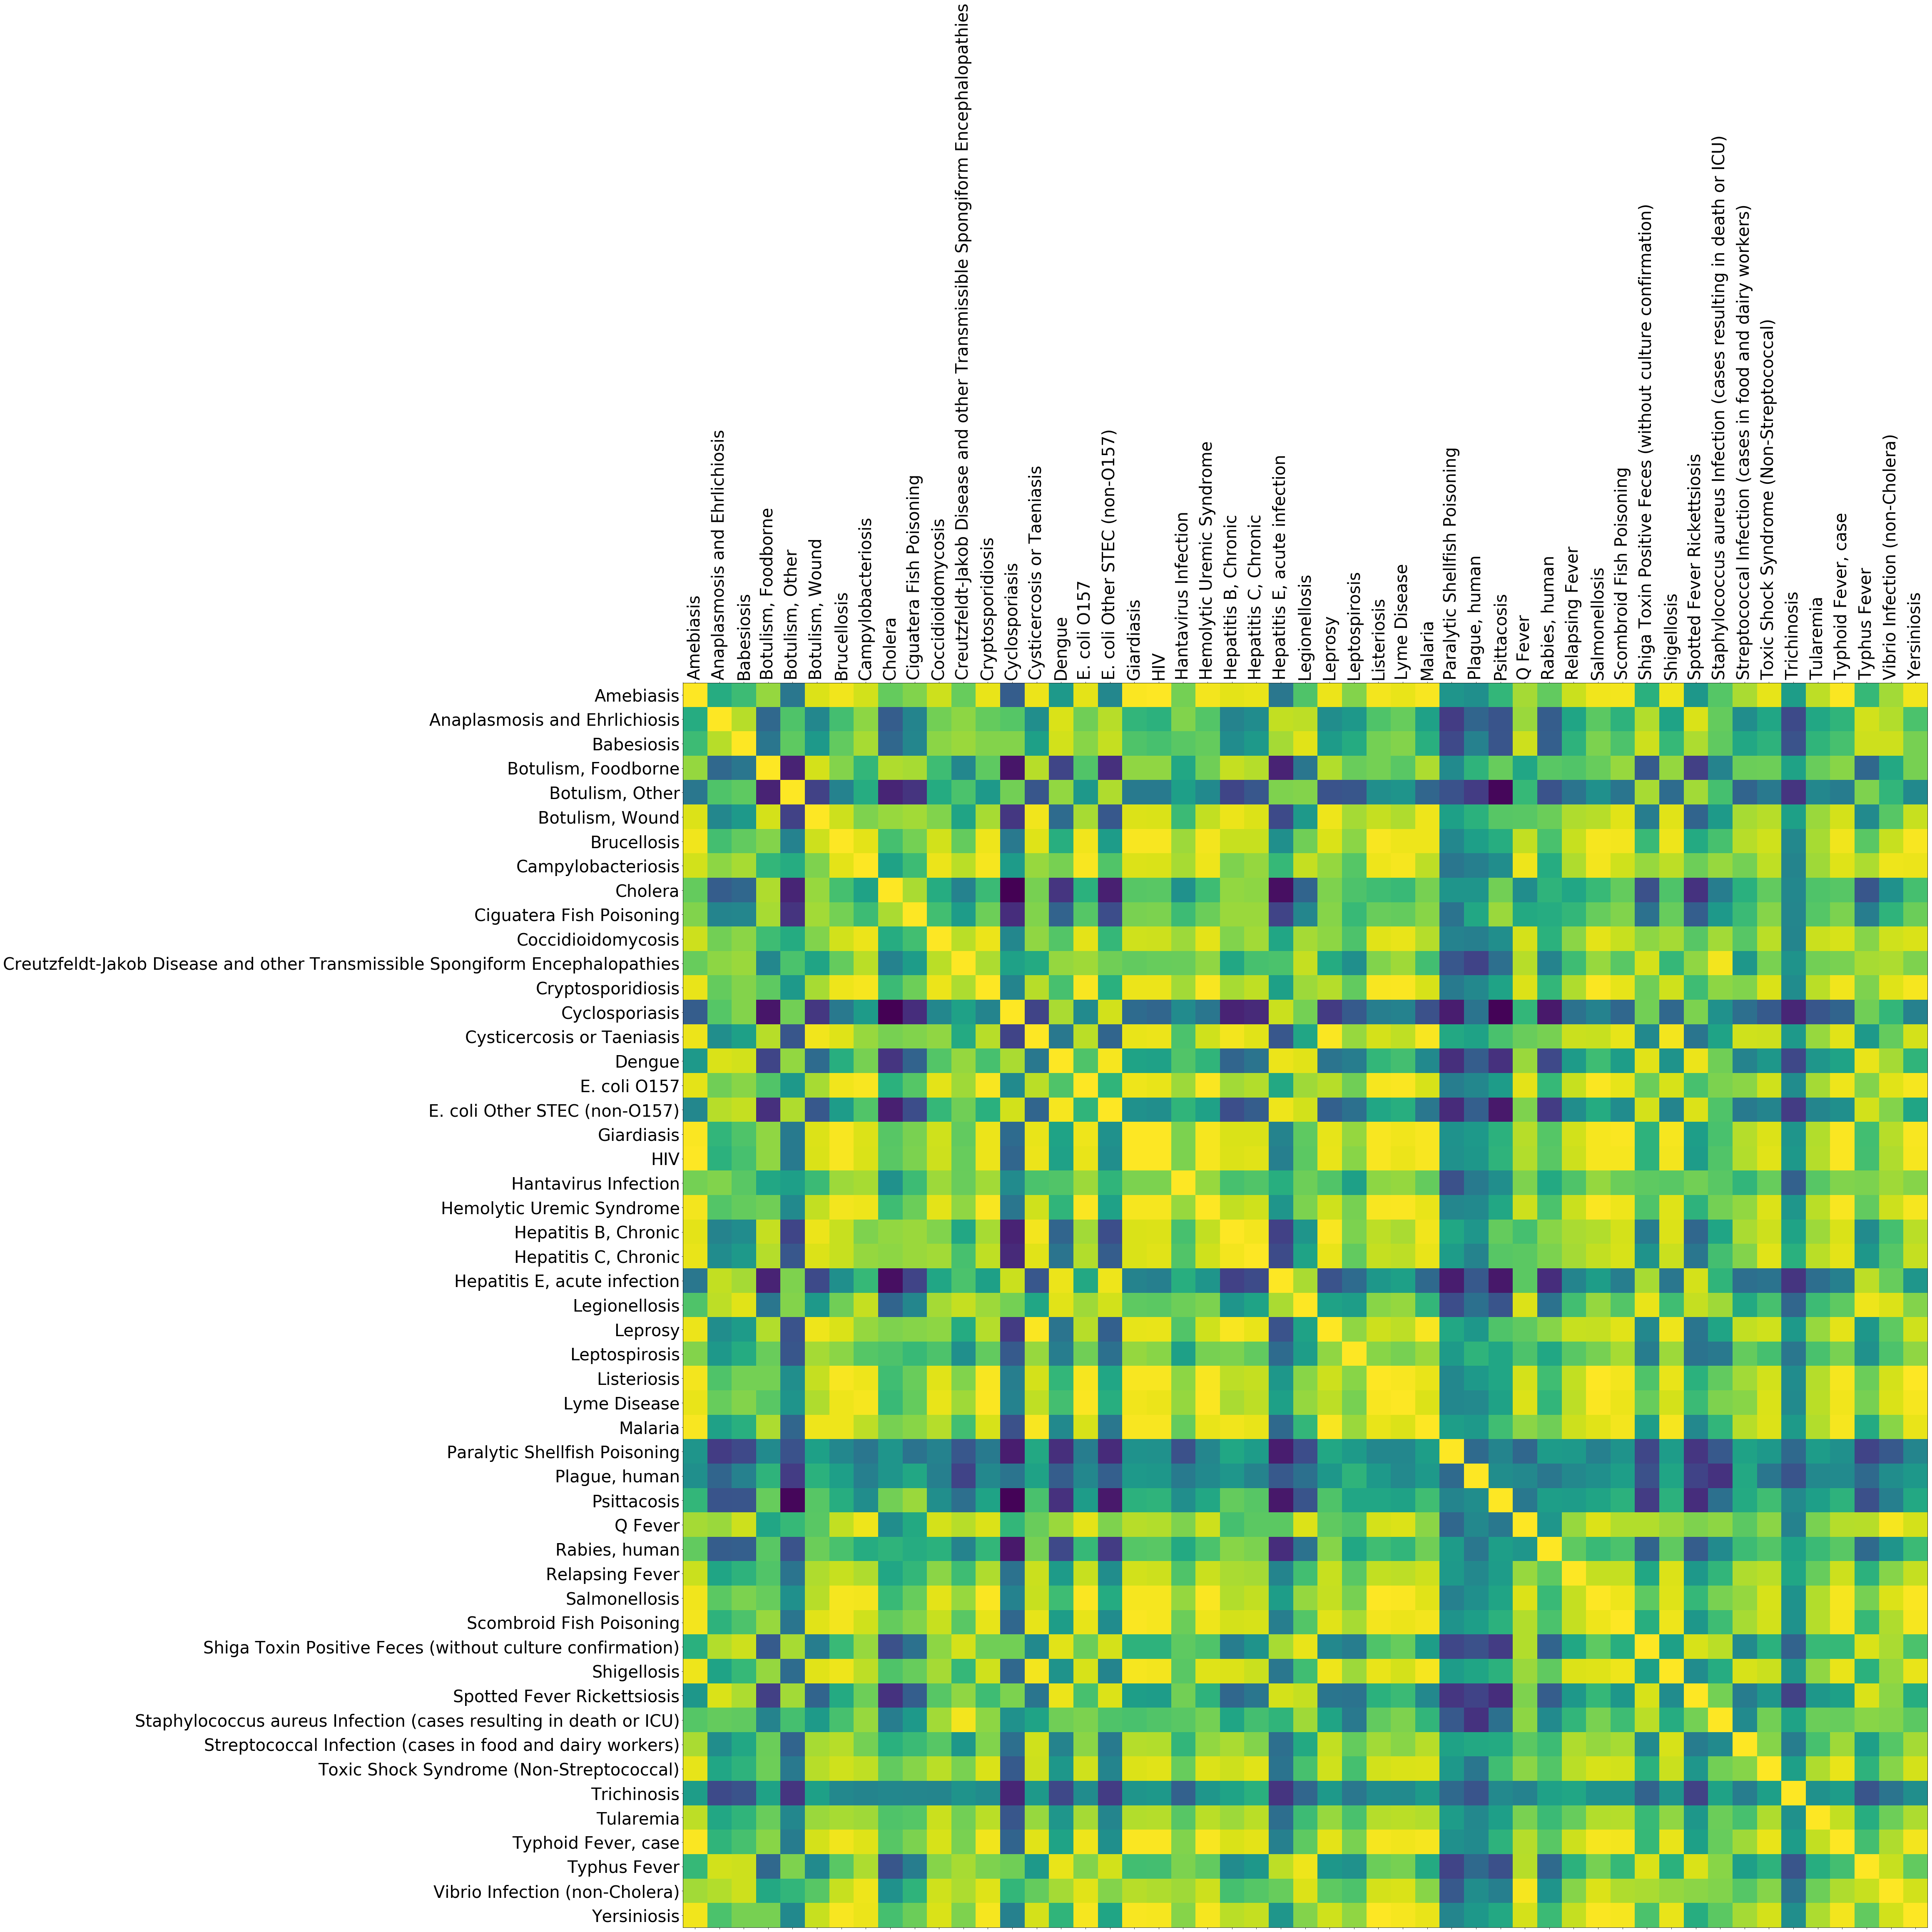

In [749]:
m = c6.corr()
fig, ax = plt.subplots(figsize=(55, 55))
ax.matshow(m)
ax.tick_params(axis='both', labelsize=40)
plt.xticks(range(len(c6.columns)), c6.columns, rotation=90)
plt.yticks(range(len(c6.columns)), c6.columns)
plt.show()

In [750]:
# answer[answer.County== 'Alameda'].iloc[:,1:25]
# no anthrax or domoic acid poisoning

In [751]:
# answer[answer.Year== 2001].head(10)
# remove California county at index 5 

Prep for Elementary Stats

In [752]:
res1 = dis_prep.sort_values(by=['Year','County','Disease'])
alam = res1[res1.County == 'Alameda']
stan = res1[res1.County == 'Stanislaus']
al_am = alam[alam.Disease== 'Amebiasis']
i = al_am.drop(['County','Year','Population','Disease'],axis=1)
al_am.head()

Year   County    Disease  Count  Population
2438  2001  Alameda  Amebiasis     16     1465564
983   2002  Alameda  Amebiasis      9     1468468
1804  2003  Alameda  Amebiasis      6     1467187
582   2004  Alameda  Amebiasis      7     1465540
2323  2005  Alameda  Amebiasis      9     1459882

In [753]:
stan_am = stan[stan.Disease== 'Amebiasis']
j = stan_am.drop(['County','Year','Population','Disease'],axis=1)
stan_am.head()

Year      County    Disease  Count  Population
796   2001  Stanislaus  Amebiasis      5      463128
170   2002  Stanislaus  Amebiasis      5      473580
395   2003  Stanislaus  Amebiasis      1      483007
1413  2004  Stanislaus  Amebiasis      1      490283
802   2005  Stanislaus  Amebiasis      2      498020

In [754]:
corr = np.corrcoef(al_am.Count,stan_am.Count)
corr

array([[1.       , 0.2433881],
       [0.2433881, 1.       ]])

In [755]:
from scipy import stats

stats.pearsonr(al_am.Count,stan_am.Count)

(0.24338809817241822, 0.38205659238977113)

In [756]:
j.head()

Count
796       5
170       5
395       1
1413      1
802       2

In [757]:
i['Count2'] = j.values
i.head()

Count  Count2
2438     16       5
983       9       5
1804      6       1
582       7       1
2323      9       2

In [758]:
i.corr()

Count    Count2
Count   1.000000  0.243388
Count2  0.243388  1.000000

In [759]:
ii = al_am.drop(['County','Population','Disease'],axis=1)
jj = stan_am.drop(['County','Population','Disease'],axis=1)
e = ii.set_index('Year')

In [760]:
f = jj.set_index('Year')
f.head()

Count
Year       
2001      5
2002      5
2003      1
2004      1
2005      2

In [761]:
e['Count2'] = f.values
e.head()

Count  Count2
Year               
2001     16       5
2002      9       5
2003      6       1
2004      7       1
2005      9       2

In [762]:
e['Count'].corr(e['Count2'])

0.24338809817241816

In [763]:
e.corr()

Count    Count2
Count   1.000000  0.243388
Count2  0.243388  1.000000

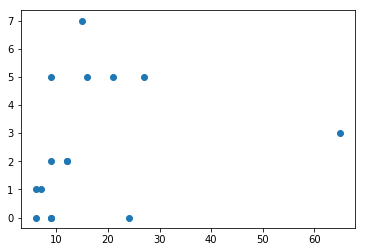

In [764]:
plt.scatter(e.Count,e.Count2)
# count scatter on amebiasis in two counties 

In [765]:
alam[alam.Disease== 'Babesiosis'].head()
# since rows removed with Count == 0, must restore them

Year   County     Disease  Count  Population
9566   2001  Alameda  Babesiosis      0     1465564
8967   2002  Alameda  Babesiosis      0     1468468
10486  2003  Alameda  Babesiosis      0     1467187
9261   2004  Alameda  Babesiosis      0     1465540
8638   2005  Alameda  Babesiosis      0     1459882

In [766]:
res = pd.get_dummies(data=dis_fin,columns=['Disease'])
res.head()
# for each county and year, return porfolio of diseases with count on each 
# disease and population years will be repeated in rows 
# so group by county 

Year         County  Count  Population  Disease_Amebiasis  \
5   2006           Napa      2      131920                  1   
10  2013        Ventura      7      842639                  1   
14  2008  Santa Barbara      6      419970                  1   
17  2003         Sonoma      3      468257                  1   
20  2005          Kings      1      144601                  1   

    Disease_Anaplasmosis and Ehrlichiosis  Disease_Babesiosis  \
5                                       0                   0   
10                                      0                   0   
14                                      0                   0   
17                                      0                   0   
20                                      0                   0   

    Disease_Botulism, Foodborne  Disease_Botulism, Other  \
5                             0                        0   
10                            0                        0   
14                            0                        0   
17                            0                        0   
20                            0                        0   

    Disease_Botulism, Wound  ...  Disease_Spotted Fever Rickettsiosis  \
5                         0  ...                                    0   
10                        0  ...                                    0   
14                        0  ...                                    0   
17                        0  ...                                    0   
20                        0  ...                                    0   

    Disease_Staphylococcus aureus Infection (cases resulting in death or ICU)  \
5                                                   0                           
10                                                  0                           
14                                                  0                           
17                                                  0                           
20                                                  0                           

    Disease_Streptococcal Infection (cases in food and dairy workers)  \
5                                                   0                   
10                                                  0                   
14                                                  0                   
17                                                  0                   
20                                                  0                   

    Disease_Toxic Shock Syndrome (Non-Streptococcal)  Disease_Trichinosis  \
5                                                  0                    0   
10                                                 0                    0   
14                                                 0                    0   
17                                                 0                    0   
20                                                 0                    0   

    Disease_Tularemia  Disease_Typhoid Fever, case  Disease_Typhus Fever  \
5                   0                            0                     0   
10                  0                            0                     0   
14                  0                            0                     0   
17                  0                            0                     0   
20                  0                            0                     0   

    Disease_Vibrio Infection (non-Cholera)  Disease_Yersiniosis  
5                                        0                    0  
10                                       0                    0  
14                                       0                    0  
17                                       0                    0  
20                                       0                    0  

[5 rows x 55 columns]

In [767]:
# res.columns

In [768]:
res_g = res.groupby(['Year', 'County', 'Population']).agg({'Disease_Amebiasis' : 'sum',
       'Disease_Anaplasmosis and Ehrlichiosis' : 'sum', 'Disease_Babesiosis': 'sum',
       'Disease_Botulism, Foodborne': 'sum', 'Disease_Botulism, Other': 'sum',
       'Disease_Botulism, Wound': 'sum', 'Disease_Brucellosis': 'sum',
       'Disease_Campylobacteriosis': 'sum', 'Disease_Cholera': 'sum',
       'Disease_Ciguatera Fish Poisoning': 'sum', 'Disease_Coccidioidomycosis': 'sum',
       'Disease_Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies': 'sum',
       'Disease_Cryptosporidiosis': 'sum', 'Disease_Cyclosporiasis': 'sum',
       'Disease_Cysticercosis or Taeniasis': 'sum', 'Disease_Dengue': 'sum',
       'Disease_E. coli O157': 'sum', 'Disease_E. coli Other STEC (non-O157)': 'sum',
       'Disease_Giardiasis': 'sum', 'Disease_HIV': 'sum', 'Disease_Hantavirus Infection': 'sum',
       'Disease_Hemolytic Uremic Syndrome': 'sum', 'Disease_Hepatitis B, Chronic': 'sum',
       'Disease_Hepatitis C, Chronic': 'sum', 'Disease_Hepatitis E, acute infection': 'sum',
       'Disease_Legionellosis': 'sum', 'Disease_Leprosy': 'sum', 'Disease_Leptospirosis': 'sum',
       'Disease_Listeriosis': 'sum', 'Disease_Lyme Disease': 'sum', 'Disease_Malaria': 'sum',
       'Disease_Paralytic Shellfish Poisoning': 'sum', 'Disease_Plague, human': 'sum',
       'Disease_Psittacosis': 'sum', 'Disease_Q Fever': 'sum', 'Disease_Rabies, human': 'sum',
       'Disease_Relapsing Fever': 'sum', 'Disease_Salmonellosis': 'sum',
       'Disease_Scombroid Fish Poisoning': 'sum',
       'Disease_Shiga Toxin Positive Feces (without culture confirmation)': 'sum',
       'Disease_Shigellosis': 'sum', 'Disease_Spotted Fever Rickettsiosis': 'sum',
       'Disease_Staphylococcus aureus Infection (cases resulting in death or ICU)': 'sum',
       'Disease_Streptococcal Infection (cases in food and dairy workers)': 'sum',
       'Disease_Toxic Shock Syndrome (Non-Streptococcal)': 'sum',
       'Disease_Trichinosis': 'sum', 'Disease_Tularemia': 'sum',
       'Disease_Typhoid Fever, case': 'sum', 'Disease_Typhus Fever': 'sum',
       'Disease_Vibrio Infection (non-Cholera)': 'sum', 'Disease_Yersiniosis': 'sum'}).reset_index()

In [769]:
res_g.head()

Year     County  Population  Disease_Amebiasis  \
0  2001    Alameda     1465564                  1   
1  2001     Alpine        1237                  0   
2  2001     Amador       35784                  0   
3  2001      Butte      205730                  1   
4  2001  Calaveras       41428                  0   

   Disease_Anaplasmosis and Ehrlichiosis  Disease_Babesiosis  \
0                                      0                   0   
1                                      0                   0   
2                                      0                   0   
3                                      0                   0   
4                                      0                   0   

   Disease_Botulism, Foodborne  Disease_Botulism, Other  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   Disease_Botulism, Wound  Disease_Brucellosis  ...  \
0                        0                    1  ...   
1                        0                    0  ...   
2                        0                    0  ...   
3                        0                    0  ...   
4                        0                    0  ...   

   Disease_Spotted Fever Rickettsiosis  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   Disease_Staphylococcus aureus Infection (cases resulting in death or ICU)  \
0                                                  0                           
1                                                  0                           
2                                                  0                           
3                                                  0                           
4                                                  0                           

   Disease_Streptococcal Infection (cases in food and dairy workers)  \
0                                                  1                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   Disease_Toxic Shock Syndrome (Non-Streptococcal)  Disease_Trichinosis  \
0                                                 1                    1   
1                                                 0                    0   
2                                                 0                    0   
3                                                 0                    0   
4                                                 0                    1   

   Disease_Tularemia  Disease_Typhoid Fever, case  Disease_Typhus Fever  \
0                  0                            1                     0   
1                  0                            0                     0   
2                  0                            0                     0   
3                  0                            0                     0   
4                  0                            0                     0   

   Disease_Vibrio Infection (non-Cholera)  Disease_Yersiniosis  
0                                       1                    1  
1                                       0                    0  
2                                       0                    0  
3                                       0                    0  
4                                       0                    0  

[5 rows x 54 columns]

In [770]:
df_test = res_g[res_g.columns[3:]]

In [771]:
df_test.head()

Disease_Amebiasis  Disease_Anaplasmosis and Ehrlichiosis  \
0                  1                                      0   
1                  0                                      0   
2                  0                                      0   
3                  1                                      0   
4                  0                                      0   

   Disease_Babesiosis  Disease_Botulism, Foodborne  Disease_Botulism, Other  \
0                   0                            0                        0   
1                   0                            0                        0   
2                   0                            0                        0   
3                   0                            0                        0   
4                   0                            0                        0   

   Disease_Botulism, Wound  Disease_Brucellosis  Disease_Campylobacteriosis  \
0                        0                    1                           1   
1                        0                    0                           0   
2                        0                    0                           1   
3                        0                    0                           1   
4                        0                    0                           1   

   Disease_Cholera  Disease_Ciguatera Fish Poisoning  ...  \
0                0                                 1  ...   
1                0                                 0  ...   
2                0                                 0  ...   
3                0                                 0  ...   
4                0                                 0  ...   

   Disease_Spotted Fever Rickettsiosis  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   Disease_Staphylococcus aureus Infection (cases resulting in death or ICU)  \
0                                                  0                           
1                                                  0                           
2                                                  0                           
3                                                  0                           
4                                                  0                           

   Disease_Streptococcal Infection (cases in food and dairy workers)  \
0                                                  1                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   Disease_Toxic Shock Syndrome (Non-Streptococcal)  Disease_Trichinosis  \
0                                                 1                    1   
1                                                 0                    0   
2                                                 0                    0   
3                                                 0                    0   
4                                                 0                    1   

   Disease_Tularemia  Disease_Typhoid Fever, case  Disease_Typhus Fever  \
0                  0                            1                     0   
1                  0                            0                     0   
2                  0                            0                     0   
3                  0                            0                     0   
4                  0                            0                     0   

   Disease_Vibrio Infection (non-Cholera)  Disease_Yersiniosis  
0                                       1                    1  
1                                       0                    0  
2                                    

In [772]:
df_sum = pd.DataFrame(df_test.sum(axis = 1))
df_sum.head()

0
0  29
1   1
2   6
3  13
4   8

In [773]:
df_all = res_g.join(df_sum)

In [774]:
df_all.head()
# disease portfolio/profile

Year     County  Population  Disease_Amebiasis  \
0  2001    Alameda     1465564                  1   
1  2001     Alpine        1237                  0   
2  2001     Amador       35784                  0   
3  2001      Butte      205730                  1   
4  2001  Calaveras       41428                  0   

   Disease_Anaplasmosis and Ehrlichiosis  Disease_Babesiosis  \
0                                      0                   0   
1                                      0                   0   
2                                      0                   0   
3                                      0                   0   
4                                      0                   0   

   Disease_Botulism, Foodborne  Disease_Botulism, Other  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   Disease_Botulism, Wound  Disease_Brucellosis  ...  \
0                        0                    1  ...   
1                        0                    0  ...   
2                        0                    0  ...   
3                        0                    0  ...   
4                        0                    0  ...   

   Disease_Staphylococcus aureus Infection (cases resulting in death or ICU)  \
0                                                  0                           
1                                                  0                           
2                                                  0                           
3                                                  0                           
4                                                  0                           

   Disease_Streptococcal Infection (cases in food and dairy workers)  \
0                                                  1                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   Disease_Toxic Shock Syndrome (Non-Streptococcal)  Disease_Trichinosis  \
0                                                 1                    1   
1                                                 0                    0   
2                                                 0                    0   
3                                                 0                    0   
4                                                 0                    1   

   Disease_Tularemia  Disease_Typhoid Fever, case  Disease_Typhus Fever  \
0                  0                            1                     0   
1                  0                            0                     0   
2                  0                            0                     0   
3                  0                            0                     0   
4                  0                            0                     0   

   Disease_Vibrio Infection (non-Cholera)  Disease_Yersiniosis   0  
0                                       1                    1  29  
1                                       0                    0   1  
2                                       0                    0   6  
3                                       0                    0  13  
4                                       0                    0   8  

[5 rows x 55 columns]

In [775]:
df_all = df_all.rename(columns = {0 : 'sum_counts'})
df_all.head()

Year     County  Population  Disease_Amebiasis  \
0  2001    Alameda     1465564                  1   
1  2001     Alpine        1237                  0   
2  2001     Amador       35784                  0   
3  2001      Butte      205730                  1   
4  2001  Calaveras       41428                  0   

   Disease_Anaplasmosis and Ehrlichiosis  Disease_Babesiosis  \
0                                      0                   0   
1                                      0                   0   
2                                      0                   0   
3                                      0                   0   
4                                      0                   0   

   Disease_Botulism, Foodborne  Disease_Botulism, Other  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   Disease_Botulism, Wound  Disease_Brucellosis  ...  \
0                        0                    1  ...   
1                        0                    0  ...   
2                        0                    0  ...   
3                        0                    0  ...   
4                        0                    0  ...   

   Disease_Staphylococcus aureus Infection (cases resulting in death or ICU)  \
0                                                  0                           
1                                                  0                           
2                                                  0                           
3                                                  0                           
4                                                  0                           

   Disease_Streptococcal Infection (cases in food and dairy workers)  \
0                                                  1                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   Disease_Toxic Shock Syndrome (Non-Streptococcal)  Disease_Trichinosis  \
0                                                 1                    1   
1                                                 0                    0   
2                                                 0                    0   
3                                                 0                    0   
4                                                 0                    1   

   Disease_Tularemia  Disease_Typhoid Fever, case  Disease_Typhus Fever  \
0                  0                            1                     0   
1                  0                            0                     0   
2                  0                            0                     0   
3                  0                            0                     0   
4                  0                            0                     0   

   Disease_Vibrio Infection (non-Cholera)  Disease_Yersiniosis  sum_counts  
0                                       1                    1          29  
1                                       0                    0           1  
2                                       0                    0           6  
3                                       0                    0          13  
4                                       0                    0           8  

[5 rows x 55 columns]

In [776]:
ans = df_all[['Year', 'County', 'Population', 'sum_counts']]
ans.head()

Year     County  Population  sum_counts
0  2001    Alameda     1465564          29
1  2001     Alpine        1237           1
2  2001     Amador       35784           6
3  2001      Butte      205730          13
4  2001  Calaveras       41428           8

In [777]:
tmp = dis_fin[dis_fin.County == 'Napa']
tmp.head(20)

Year County             Disease  Count  Population
5      2006   Napa           Amebiasis      2      131920
157    2014   Napa           Amebiasis      1      140646
304    2002   Napa           Amebiasis      1      127942
1875   2001   Napa           Amebiasis      6      126188
1887   2003   Napa           Amebiasis      3      129422
1911   2007   Napa           Amebiasis      1      133155
1947   2013   Napa           Amebiasis      2      139298
1959   2015   Napa           Amebiasis      3      141546
19620  2005   Napa         Brucellosis      1      130740
21244  2010   Napa  Campylobacteriosis     45      136237
21511  2013   Napa  Campylobacteriosis     31      139298
21534  2009   Napa  Campylobacteriosis     43      135664
21559  2005   Napa  Campylobacteriosis     22      130740
21581  2001   Napa  Campylobacteriosis     43      126188
22291  2002   Napa  Campylobacteriosis     49      127942
22339  2006   Napa  Campylobacteriosis     33      131920
22404  2012   Napa  Campylobacteriosis     53      138655
22458  2014   Napa  Campylobacteriosis     42      140646
22502  2004   Napa  Campylobacteriosis     36      130204
22616  2008   Napa  Campylobacteriosis     27      134786

In [778]:
nap = res[res.County =='Napa']
nap[nap.Year == 2006]
# will need to do some reduction, which will include getting one year, one county, disease portfolio
# won't need the count column, keep population, do a sum over each disease column
# since there is only one instance of count, the binary value of 1 will need to be replaced by the count for that year
# if there is a 1 for some disease column and year row, replace the value 1 with the count value
# this should help us get rid of many row/observations, get all the disease counts in the disease columns for a given year
# should not have more than 15 rows, one for every year, where population and portfolio counts vary 
# groupby county after reducing rows to year, pop and portfolio

Year County  Count  Population  Disease_Amebiasis  \
5       2006   Napa      2      131920                  1   
22339   2006   Napa     33      131920                  0   
29299   2006   Napa      3      131920                  0   
45858   2006   Napa      5      131920                  0   
51642   2006   Napa     23      131920                  0   
54031   2006   Napa     13      131920                  0   
58031   2006   Napa      1      131920                  0   
61775   2006   Napa     12      131920                  0   
63478   2006   Napa     90      131920                  0   
66780   2006   Napa      1      131920                  0   
79823   2006   Napa      3      131920                  0   
100258  2006   Napa     14      131920                  0   
105820  2006   Napa      3      131920                  0   

        Disease_Anaplasmosis and Ehrlichiosis  Disease_Babesiosis  \
5                                           0                   0   
22339                                       0                   0   
29299                                       0                   0   
45858                                       0                   0   
51642                                       0                   0   
54031                                       0                   0   
58031                                       0                   0   
61775                                       0                   0   
63478                                       0                   0   
66780                                       0                   0   
79823                                       0                   0   
100258                                      0                   0   
105820                                      0                   0   

        Disease_Botulism, Foodborne  Disease_Botulism, Other  \
5                                 0                        0   
22339                             0                        0   
29299                             0                        0   
45858                             0                        0   
51642                             0                        0   
54031                             0                        0   
58031                             0                        0   
61775                             0                        0   
63478                             0                        0   
66780                             0                        0   
79823                             0                        0   
100258                            0                        0   
105820                            0                        0   

        Disease_Botulism, Wound  ...  Disease_Spotted Fever Rickettsiosis  \
5                             0  ...                                    0   
22339                         0  ...                                    0   
29299                         0  ...                                    0   
45858                         0  ...                                    0   
51642                         0  ...                                    0   
54031                         0  ...                                    0   
58031                         0  ...                                    0   
61775                         0  ...                                    0   
63478                         0  ...                                    0   
66780                         0  ...                                    0   
79823                         0  ...                                    0   
100258                        0  ...                                    0   
105820                        0  ...                                    0   

        Disease_Staphylococcus aureus Infection (cases resulting in death or ICU)  \
5                                                       0                           
22339                                   

In [779]:
len(disease.Year.unique())
# 15 years: 2001 - 2015

15

In [780]:
disease.Year.isnull().sum()

0

In [781]:
disease['Year'] = disease['Year'].astype(int)
disease['Year'].head()

0    2005
1    2005
2    2010
3    2001
4    2014
Name: Year, dtype: int32

In [782]:
disease['County'].unique()

array(['Solano', 'Marin', 'Kern', 'Tulare', 'Los Angeles', 'Napa',
       'Mariposa', 'Shasta', 'Sutter', 'Lake', 'Ventura', 'Sierra',
       'Mono', 'Madera', 'Santa Barbara', 'Inyo', 'Sonoma',
       'San Bernardino', 'Kings', 'Tehama', 'Tuolumne', 'Yuba',
       'San Mateo', 'Monterey', 'San Benito', 'Nevada', 'Santa Clara',
       'Merced', 'Plumas', 'Stanislaus', 'Trinity', 'San Francisco',
       'Yolo', 'Lassen', 'Mendocino', 'Sacramento', 'Placer',
       'Santa Cruz', 'Orange', 'San Diego', 'Riverside', 'Modoc',
       'Siskiyou', 'San Luis Obispo', 'Imperial', 'Humboldt',
       'San Joaquin', 'Alpine', 'Alameda', 'Amador', 'Contra Costa',
       'California', 'Calaveras', 'Glenn', 'Butte', 'El Dorado', 'Fresno',
       'Del Norte', 'Colusa'], dtype=object)

In [783]:
disease['County'].nunique()

59

In [784]:
disease.sort_values('County').head()

Disease   County  Year  \
103455  Shiga Toxin Positive Feces (without culture co...  Alameda  2015   
89171                                         Psittacosis  Alameda  2004   
109309                        Spotted Fever Rickettsiosis  Alameda  2005   
37862                          Cysticercosis or Taeniasis  Alameda  2005   
32245   Creutzfeldt-Jakob Disease and other Transmissi...  Alameda  2009   

           Sex  Count  Population   Rate  CI. lower  CI.upper Unstable  
103455   Total      2     1619679  0.123      0.015     0.446        *  
89171   Female      0      746723  0.000      0.000     0.494        -  
109309   Total      0     1459882  0.000      0.000     0.253        -  
37862     Male      2      716004  0.279      0.034     1.009        *  
32245    Total      1     1503827  0.066      0.002     0.370        *

In [785]:
disease['County'] = disease['County'].str.strip(' ')
disease.head()

Disease       County  Year     Sex  Count  Population   Rate  CI. lower  \
0  Amebiasis       Solano  2005   Total      0      410570  0.000      0.000   
1  Amebiasis        Marin  2005    Male      4      121710  3.287      0.895   
2  Amebiasis         Kern  2010  Female      1      404863  0.247      0.006   
3  Amebiasis       Tulare  2001  Female      1      186935  0.535      0.014   
4  Amebiasis  Los Angeles  2014  Female     17     5127242  0.332      0.193   

   CI.upper Unstable  
0     0.898        -  
1     8.415        *  
2     1.376        *  
3     2.980        *  
4     0.531        *

In [786]:
disease['County'].unique()

array(['Solano', 'Marin', 'Kern', 'Tulare', 'Los Angeles', 'Napa',
       'Mariposa', 'Shasta', 'Sutter', 'Lake', 'Ventura', 'Sierra',
       'Mono', 'Madera', 'Santa Barbara', 'Inyo', 'Sonoma',
       'San Bernardino', 'Kings', 'Tehama', 'Tuolumne', 'Yuba',
       'San Mateo', 'Monterey', 'San Benito', 'Nevada', 'Santa Clara',
       'Merced', 'Plumas', 'Stanislaus', 'Trinity', 'San Francisco',
       'Yolo', 'Lassen', 'Mendocino', 'Sacramento', 'Placer',
       'Santa Cruz', 'Orange', 'San Diego', 'Riverside', 'Modoc',
       'Siskiyou', 'San Luis Obispo', 'Imperial', 'Humboldt',
       'San Joaquin', 'Alpine', 'Alameda', 'Amador', 'Contra Costa',
       'California', 'Calaveras', 'Glenn', 'Butte', 'El Dorado', 'Fresno',
       'Del Norte', 'Colusa'], dtype=object)

In [787]:
gdp = pd.read_excel('gdp.xlsx',sheet_name='Real GDP')
gdp.head()

Unnamed: 0  Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0       FIPS  Countyname     Postal   LineCode   
1        NaN         NaN        NaN        NaN   
2        NaN         NaN        NaN        NaN   
3      01001     Autauga         AL          1   
4      01001     Autauga         AL          2   

                             Unnamed: 4  \
0                          IndustryName   
1                                   NaN   
2                                   NaN   
3                        All Industries   
4    Private goods-producing industries   

                                    Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0  Real Gross domestic product (GDP) by county        NaN        NaN   
1          (thousands of chained 2012 dollars)        NaN        NaN   
2                                         2012       2013       2014   
3                                      1383941    1322416    1312668   
4                                       286396     299115     310672   

  Unnamed: 8  
0        NaN  
1        NaN  
2       2015  
3    1412939  
4     325250

In [788]:
gdp.rename(columns={"Unnamed: 0":"FIPS", "Unnamed: 1":"County", "Unnamed: 2":"Postal", "Unnamed: 3":"LineCode", "Unnamed: 4":"IndustryName", "Unnamed: 5":"2012", "Unnamed: 6":"2013","Unnamed: 7":"2014", "Unnamed: 8":"2015"}, inplace=True)

In [789]:
gdp1 = gdp.loc[3:,:]
gdp1.head()

FIPS   County Postal LineCode                             IndustryName  \
3  01001  Autauga     AL        1                           All Industries   
4  01001  Autauga     AL        2       Private goods-producing industries   
5  01001  Autauga     AL        3    Private services-providing industries   
6  01001  Autauga     AL        4    Government and government enterprises   
7  01003  Baldwin     AL        1                           All Industries   

      2012     2013     2014     2015  
3  1383941  1322416  1312668  1412939  
4   286396   299115   310672   325250  
5   948490   880098   861153   946148  
6   149055   143062   140893   141294  
7  5599194  6218819  6247887  5981958

In [790]:
gdp_l = gdp1[gdp1['LineCode']==1]
gdp_l.drop(['FIPS','LineCode','IndustryName'],axis=1,inplace=True)
gdp_l.head()

C:\Users\aufst\OneDrive\Music\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


County Postal     2012     2013     2014     2015
3   Autauga     AL  1383941  1322416  1312668  1412939
7   Baldwin     AL  5599194  6218819  6247887  5981958
11  Barbour     AL   639833   687532   663462   708778
15     Bibb     AL   297560   314380   305472   291780
19   Blount     AL   632761   683949   661352   778131

In [791]:
gdp_last = pd.melt(gdp_l,id_vars=['County','Postal'], var_name='Year', value_name='GDP')
gdp_last.head()

County Postal  Year      GDP
0  Autauga     AL  2012  1383941
1  Baldwin     AL  2012  5599194
2  Barbour     AL  2012   639833
3     Bibb     AL  2012   297560
4   Blount     AL  2012   632761

In [792]:
gdp_last[gdp_last['County']=='Baldwin'].head()

County Postal  Year      GDP
1     Baldwin     AL  2012  5599194
391   Baldwin     GA  2012  1106089
3114  Baldwin     AL  2013  6218819
3504  Baldwin     GA  2013  1053999
6227  Baldwin     AL  2014  6247887

In [793]:
gdp_last['County'] = gdp_last['County'].str.strip(' ')
gdp_last.head()

County Postal  Year      GDP
0  Autauga     AL  2012  1383941
1  Baldwin     AL  2012  5599194
2  Barbour     AL  2012   639833
3     Bibb     AL  2012   297560
4   Blount     AL  2012   632761

In [794]:
gdp_last.Year.isnull().sum()

0

In [795]:
gdp_last['Year'] = gdp_last['Year'].astype(int)
gdp_last['Year'].head()

0    2012
1    2012
2    2012
3    2012
4    2012
Name: Year, dtype: int32

In [796]:
gdp_ca = gdp_last[gdp_last['Postal']=='CA']
gdp_ca.head()

County Postal  Year       GDP
186    Alameda     CA  2012  93795276
187     Alpine     CA  2012     91253
188     Amador     CA  2012   1106242
189      Butte     CA  2012   6399648
190  Calaveras     CA  2012    771457

In [797]:
gdp_ca['County'].unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [798]:
gdp_ca['County'].nunique()

58

In [799]:
gdpca = gdp_last.drop('Postal',axis=1)
gdpca.head()

County  Year      GDP
0  Autauga  2012  1383941
1  Baldwin  2012  5599194
2  Barbour  2012   639833
3     Bibb  2012   297560
4   Blount  2012   632761

In [800]:
grow = pd.read_excel('gdp.xlsx',sheet_name='Real GDP Growth')

In [801]:
grow.head()

Unnamed: 0  Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0       FIPS  Countyname     Postal   LineCode   
1        NaN         NaN        NaN        NaN   
2        NaN         NaN        NaN        NaN   
3      01001     Autauga         AL          1   
4      01001     Autauga         AL          2   

                             Unnamed: 4  \
0                          IndustryName   
1                                   NaN   
2                                   NaN   
3                        All Industries   
4    Private goods-producing industries   

                                          Unnamed: 5 Unnamed: 6 Unnamed: 7  
0  Real Gross domestic product (GDP) by county gr...        NaN        NaN  
1             (percent change from preceding period)        NaN        NaN  
2                                               2013       2014       2015  
3                                               -4.4       -0.7        7.6  
4                                                4.4        3.9        4.7

In [802]:
grow.rename(columns={"Unnamed: 0":"FIPS", "Unnamed: 1":"County", "Unnamed: 2":"Postal", "Unnamed: 3":"LineCode", "Unnamed: 4":"IndustryName", "Unnamed: 5":"2013","Unnamed: 6":"2014", "Unnamed: 7":"2015"}, inplace=True)
grow.head()

FIPS      County  Postal  LineCode                          IndustryName  \
0   FIPS  Countyname  Postal  LineCode                          IndustryName   
1    NaN         NaN     NaN       NaN                                   NaN   
2    NaN         NaN     NaN       NaN                                   NaN   
3  01001     Autauga      AL         1                        All Industries   
4  01001     Autauga      AL         2    Private goods-producing industries   

                                                2013  2014  2015  
0  Real Gross domestic product (GDP) by county gr...   NaN   NaN  
1             (percent change from preceding period)   NaN   NaN  
2                                               2013  2014  2015  
3                                               -4.4  -0.7   7.6  
4                                                4.4   3.9   4.7

In [803]:
growth = grow.iloc[3:,:]
growth.head()

FIPS   County Postal LineCode                             IndustryName  \
3  01001  Autauga     AL        1                           All Industries   
4  01001  Autauga     AL        2       Private goods-producing industries   
5  01001  Autauga     AL        3    Private services-providing industries   
6  01001  Autauga     AL        4    Government and government enterprises   
7  01003  Baldwin     AL        1                           All Industries   

   2013 2014 2015  
3  -4.4 -0.7  7.6  
4   4.4  3.9  4.7  
5  -7.2 -2.2  9.9  
6    -4 -1.5  0.3  
7  11.1  0.5 -4.3

In [804]:
growth_l = growth[growth['LineCode']==1]
growth_l.drop(['FIPS','LineCode','IndustryName'],axis=1,inplace=True)
growth_l.head()

County Postal  2013 2014  2015
3   Autauga     AL  -4.4 -0.7   7.6
7   Baldwin     AL  11.1  0.5  -4.3
11  Barbour     AL   7.5 -3.5   6.8
15     Bibb     AL   5.7 -2.8  -4.5
19   Blount     AL   8.1 -3.3  17.7

In [805]:
growth_ca = pd.melt(growth_l,id_vars=['County','Postal'],var_name='Year',value_name='GDPgrowth')
growth_ca.head()

County Postal  Year GDPgrowth
0  Autauga     AL  2013      -4.4
1  Baldwin     AL  2013      11.1
2  Barbour     AL  2013       7.5
3     Bibb     AL  2013       5.7
4   Blount     AL  2013       8.1

In [806]:
groca = growth_ca[growth_ca['Postal']=='CA']
groca.head()

County Postal  Year GDPgrowth
186    Alameda     CA  2013       4.1
187     Alpine     CA  2013     -11.8
188     Amador     CA  2013       4.5
189      Butte     CA  2013       3.9
190  Calaveras     CA  2013       1.9

In [807]:
groca['County'].str.strip(' ')
groca.head()

County Postal  Year GDPgrowth
186    Alameda     CA  2013       4.1
187     Alpine     CA  2013     -11.8
188     Amador     CA  2013       4.5
189      Butte     CA  2013       3.9
190  Calaveras     CA  2013       1.9

In [808]:
groca['Year'] = groca['Year'].astype(int)
groca['Year'].head()

C:\Users\aufst\OneDrive\Music\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


186    2013
187    2013
188    2013
189    2013
190    2013
Name: Year, dtype: int32

In [809]:
groca['County'].unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [810]:
groca['County'].nunique()

58

In [811]:
growthca = groca.drop('Postal',axis=1)
growthca.head()

County  Year GDPgrowth
186    Alameda  2013       4.1
187     Alpine  2013     -11.8
188     Amador  2013       4.5
189      Butte  2013       3.9
190  Calaveras  2013       1.9

In [812]:
unemp = pd.read_excel('unemployment.xls',sheet_name='Unemployment Med HH Inc',skiprows=range(0,7))

In [813]:
unemp.rename(columns={"Area_name":"County"}, inplace=True)
unemp.iloc[69:102,:4].head()

FIPStxt State                              County  \
69     2000    AK                              Alaska   
70     2013    AK          Aleutians East Borough, AK   
71     2016    AK      Aleutians West Census Area, AK   
72     2020    AK  Anchorage Borough/municipality, AK   
73     2050    AK              Bethel Census Area, AK   

    Rural_urban_continuum_code_2013  
69                              NaN  
70                              9.0  
71                              9.0  
72                              2.0  
73                              7.0

In [814]:
unemp[unemp['County'].str.contains(',')].head()

FIPStxt State              County  Rural_urban_continuum_code_2013  \
2     1001    AL  Autauga County, AL                              2.0   
3     1003    AL  Baldwin County, AL                              3.0   
4     1005    AL  Barbour County, AL                              6.0   
5     1007    AL     Bibb County, AL                              1.0   
6     1009    AL   Blount County, AL                              1.0   

   Urban_influence_code_2013  Metro_2013  Civilian_labor_force_2007  \
2                        2.0         1.0                    24383.0   
3                        2.0         1.0                    82659.0   
4                        6.0         0.0                    10334.0   
5                        1.0         1.0                     8791.0   
6                        1.0         1.0                    26629.0   

   Employed_2007  Unemployed_2007  Unemployment_rate_2007  ...  \
2        23577.0            806.0                     3.3  ...   
3        80099.0           2560.0                     3.1  ...   
4         9684.0            650.0                     6.3  ...   
5         8432.0            359.0                     4.1  ...   
6        25780.0            849.0                     3.2  ...   

   Civilian_labor_force_2016  Employed_2016  Unemployed_2016  \
2                    25918.0        24593.0           1325.0   
3                    90500.0        85656.0           4844.0   
4                     8402.0         7700.0            702.0   
5                     8607.0         8050.0            557.0   
6                    24576.0        23248.0           1328.0   

   Unemployment_rate_2016  Civilian_labor_force_2017  Employed_2017  \
2                     5.1                    25909.0        24908.0   
3                     5.4                    91567.0        87915.0   
4                     8.4                     8236.0         7750.0   
5                     6.5                     8506.0         8133.0   
6                     5.4                    24494.0        23509.0   

   Unemployed_2017  Unemployment_rate_2017  Median_Household_Income_2017  \
2           1001.0                     3.9                       58343.0   
3           3652.0                     4.0                       56607.0   
4            486.0                     5.9                       32490.0   
5            373.0                     4.4                       45795.0   
6            985.0                     4.0                       48253.0   

   Med_HH_Income_Percent_of_State_Total_2017  
2                                      121.1  
3                                      117.5  
4                                       67.4  
5                                       95.0  
6                                      100.1  

[5 rows x 52 columns]

In [815]:
unemp[unemp['County'].str.contains('/')].head()

FIPStxt State                              County  \
72      2020    AK  Anchorage Borough/municipality, AK   
80      2110    AK             Juneau Borough/city, AK   
93      2220    AK              Sitka Borough/city, AK   
98      2275    AK           Wrangell Borough/city, AK   
100     2282    AK            Yakutat Borough/city, AK   

     Rural_urban_continuum_code_2013  Urban_influence_code_2013  Metro_2013  \
72                               2.0                        2.0         1.0   
80                               5.0                        8.0         0.0   
93                               7.0                       11.0         0.0   
98                               9.0                       12.0         0.0   
100                              9.0                       12.0         0.0   

     Civilian_labor_force_2007  Employed_2007  Unemployed_2007  \
72                    151051.0       143336.0           7715.0   
80                     18459.0        17626.0            833.0   
93                      4635.0         4398.0            237.0   
98                         NaN            NaN              NaN   
100                      308.0          287.0             21.0   

     Unemployment_rate_2007  ...  Civilian_labor_force_2016  Employed_2016  \
72                      5.1  ...                   155798.0       147142.0   
80                      4.5  ...                    17372.0        16587.0   
93                      5.1  ...                     4380.0         4176.0   
98                      NaN  ...                     1056.0          976.0   
100                     6.8  ...                      245.0          224.0   

     Unemployed_2016  Unemployment_rate_2016  Civilian_labor_force_2017  \
72            8656.0                     5.6                   155462.0   
80             785.0                     4.5                    17435.0   
93             204.0                     4.7                     4449.0   
98              80.0                     7.6                     1050.0   
100             21.0                     8.6                      235.0   

     Employed_2017  Unemployed_2017  Unemployment_rate_2017  \
72        146175.0           9287.0                     6.0   
80         16607.0            828.0                     4.7   
93          4241.0            208.0                     4.7   
98           969.0             81.0                     7.7   
100          213.0             22.0                     9.4   

     Median_Household_Income_2017  Med_HH_Income_Percent_of_State_Total_2017  
72                        78579.0                                      106.1  
80                        90436.0                                      122.1  
93                        69501.0                                       93.8  
98                        55696.0                                       75.2  
100                       59955.0                                       81.0  

[5 rows x 52 columns]

In [816]:
unemp[unemp['County'].str.contains('County')].head()

FIPStxt State              County  Rural_urban_continuum_code_2013  \
2     1001    AL  Autauga County, AL                              2.0   
3     1003    AL  Baldwin County, AL                              3.0   
4     1005    AL  Barbour County, AL                              6.0   
5     1007    AL     Bibb County, AL                              1.0   
6     1009    AL   Blount County, AL                              1.0   

   Urban_influence_code_2013  Metro_2013  Civilian_labor_force_2007  \
2                        2.0         1.0                    24383.0   
3                        2.0         1.0                    82659.0   
4                        6.0         0.0                    10334.0   
5                        1.0         1.0                     8791.0   
6                        1.0         1.0                    26629.0   

   Employed_2007  Unemployed_2007  Unemployment_rate_2007  ...  \
2        23577.0            806.0                     3.3  ...   
3        80099.0           2560.0                     3.1  ...   
4         9684.0            650.0                     6.3  ...   
5         8432.0            359.0                     4.1  ...   
6        25780.0            849.0                     3.2  ...   

   Civilian_labor_force_2016  Employed_2016  Unemployed_2016  \
2                    25918.0        24593.0           1325.0   
3                    90500.0        85656.0           4844.0   
4                     8402.0         7700.0            702.0   
5                     8607.0         8050.0            557.0   
6                    24576.0        23248.0           1328.0   

   Unemployment_rate_2016  Civilian_labor_force_2017  Employed_2017  \
2                     5.1                    25909.0        24908.0   
3                     5.4                    91567.0        87915.0   
4                     8.4                     8236.0         7750.0   
5                     6.5                     8506.0         8133.0   
6                     5.4                    24494.0        23509.0   

   Unemployed_2017  Unemployment_rate_2017  Median_Household_Income_2017  \
2           1001.0                     3.9                       58343.0   
3           3652.0                     4.0                       56607.0   
4            486.0                     5.9                       32490.0   
5            373.0                     4.4                       45795.0   
6            985.0                     4.0                       48253.0   

   Med_HH_Income_Percent_of_State_Total_2017  
2                                      121.1  
3                                      117.5  
4                                       67.4  
5                                       95.0  
6                                      100.1  

[5 rows x 52 columns]

In [817]:
unemp['County'] = unemp['County'].apply(lambda x:x.split(',')[0])
unemp.head()

FIPStxt State          County  Rural_urban_continuum_code_2013  \
0        0    US   United States                              NaN   
1     1000    AL         Alabama                              NaN   
2     1001    AL  Autauga County                              2.0   
3     1003    AL  Baldwin County                              3.0   
4     1005    AL  Barbour County                              6.0   

   Urban_influence_code_2013  Metro_2013  Civilian_labor_force_2007  \
0                        NaN         NaN                152191093.0   
1                        NaN         NaN                  2175612.0   
2                        2.0         1.0                    24383.0   
3                        2.0         1.0                    82659.0   
4                        6.0         0.0                    10334.0   

   Employed_2007  Unemployed_2007  Unemployment_rate_2007  ...  \
0    145156134.0        7034959.0                     4.6  ...   
1      2089127.0          86485.0                     4.0  ...   
2        23577.0            806.0                     3.3  ...   
3        80099.0           2560.0                     3.1  ...   
4         9684.0            650.0                     6.3  ...   

   Civilian_labor_force_2016  Employed_2016  Unemployed_2016  \
0                158921892.0    151183680.0        7738212.0   
1                  2173175.0      2045624.0         127551.0   
2                    25918.0        24593.0           1325.0   
3                    90500.0        85656.0           4844.0   
4                     8402.0         7700.0            702.0   

   Unemployment_rate_2016  Civilian_labor_force_2017  Employed_2017  \
0                     4.9                160588515.0    153594100.0   
1                     5.9                  2168444.0      2073106.0   
2                     5.1                    25909.0        24908.0   
3                     5.4                    91567.0        87915.0   
4                     8.4                     8236.0         7750.0   

   Unemployed_2017  Unemployment_rate_2017  Median_Household_Income_2017  \
0        6994415.0                     4.4                       60336.0   
1          95338.0                     4.4                       48193.0   
2           1001.0                     3.9                       58343.0   
3           3652.0                     4.0                       56607.0   
4            486.0                     5.9                       32490.0   

   Med_HH_Income_Percent_of_State_Total_2017  
0                                        NaN  
1                                      100.0  
2                                      121.1  
3                                      117.5  
4                                       67.4  

[5 rows x 52 columns]

In [818]:
unemp.iloc[:,:10].head()

FIPStxt State          County  Rural_urban_continuum_code_2013  \
0        0    US   United States                              NaN   
1     1000    AL         Alabama                              NaN   
2     1001    AL  Autauga County                              2.0   
3     1003    AL  Baldwin County                              3.0   
4     1005    AL  Barbour County                              6.0   

   Urban_influence_code_2013  Metro_2013  Civilian_labor_force_2007  \
0                        NaN         NaN                152191093.0   
1                        NaN         NaN                  2175612.0   
2                        2.0         1.0                    24383.0   
3                        2.0         1.0                    82659.0   
4                        6.0         0.0                    10334.0   

   Employed_2007  Unemployed_2007  Unemployment_rate_2007  
0    145156134.0        7034959.0                     4.6  
1      2089127.0          86485.0                     4.0  
2        23577.0            806.0                     3.3  
3        80099.0           2560.0                     3.1  
4         9684.0            650.0                     6.3

In [819]:
unemp['County'] = unemp['County'].apply(lambda x:x.split('County')[0])
unemp.head()

FIPStxt State         County  Rural_urban_continuum_code_2013  \
0        0    US  United States                              NaN   
1     1000    AL        Alabama                              NaN   
2     1001    AL       Autauga                               2.0   
3     1003    AL       Baldwin                               3.0   
4     1005    AL       Barbour                               6.0   

   Urban_influence_code_2013  Metro_2013  Civilian_labor_force_2007  \
0                        NaN         NaN                152191093.0   
1                        NaN         NaN                  2175612.0   
2                        2.0         1.0                    24383.0   
3                        2.0         1.0                    82659.0   
4                        6.0         0.0                    10334.0   

   Employed_2007  Unemployed_2007  Unemployment_rate_2007  ...  \
0    145156134.0        7034959.0                     4.6  ...   
1      2089127.0          86485.0                     4.0  ...   
2        23577.0            806.0                     3.3  ...   
3        80099.0           2560.0                     3.1  ...   
4         9684.0            650.0                     6.3  ...   

   Civilian_labor_force_2016  Employed_2016  Unemployed_2016  \
0                158921892.0    151183680.0        7738212.0   
1                  2173175.0      2045624.0         127551.0   
2                    25918.0        24593.0           1325.0   
3                    90500.0        85656.0           4844.0   
4                     8402.0         7700.0            702.0   

   Unemployment_rate_2016  Civilian_labor_force_2017  Employed_2017  \
0                     4.9                160588515.0    153594100.0   
1                     5.9                  2168444.0      2073106.0   
2                     5.1                    25909.0        24908.0   
3                     5.4                    91567.0        87915.0   
4                     8.4                     8236.0         7750.0   

   Unemployed_2017  Unemployment_rate_2017  Median_Household_Income_2017  \
0        6994415.0                     4.4                       60336.0   
1          95338.0                     4.4                       48193.0   
2           1001.0                     3.9                       58343.0   
3           3652.0                     4.0                       56607.0   
4            486.0                     5.9                       32490.0   

   Med_HH_Income_Percent_of_State_Total_2017  
0                                        NaN  
1                                      100.0  
2                                      121.1  
3                                      117.5  
4                                       67.4  

[5 rows x 52 columns]

In [820]:
unemp[unemp['State'] != 'PR'].head()

FIPStxt State         County  Rural_urban_continuum_code_2013  \
0        0    US  United States                              NaN   
1     1000    AL        Alabama                              NaN   
2     1001    AL       Autauga                               2.0   
3     1003    AL       Baldwin                               3.0   
4     1005    AL       Barbour                               6.0   

   Urban_influence_code_2013  Metro_2013  Civilian_labor_force_2007  \
0                        NaN         NaN                152191093.0   
1                        NaN         NaN                  2175612.0   
2                        2.0         1.0                    24383.0   
3                        2.0         1.0                    82659.0   
4                        6.0         0.0                    10334.0   

   Employed_2007  Unemployed_2007  Unemployment_rate_2007  ...  \
0    145156134.0        7034959.0                     4.6  ...   
1      2089127.0          86485.0                     4.0  ...   
2        23577.0            806.0                     3.3  ...   
3        80099.0           2560.0                     3.1  ...   
4         9684.0            650.0                     6.3  ...   

   Civilian_labor_force_2016  Employed_2016  Unemployed_2016  \
0                158921892.0    151183680.0        7738212.0   
1                  2173175.0      2045624.0         127551.0   
2                    25918.0        24593.0           1325.0   
3                    90500.0        85656.0           4844.0   
4                     8402.0         7700.0            702.0   

   Unemployment_rate_2016  Civilian_labor_force_2017  Employed_2017  \
0                     4.9                160588515.0    153594100.0   
1                     5.9                  2168444.0      2073106.0   
2                     5.1                    25909.0        24908.0   
3                     5.4                    91567.0        87915.0   
4                     8.4                     8236.0         7750.0   

   Unemployed_2017  Unemployment_rate_2017  Median_Household_Income_2017  \
0        6994415.0                     4.4                       60336.0   
1          95338.0                     4.4                       48193.0   
2           1001.0                     3.9                       58343.0   
3           3652.0                     4.0                       56607.0   
4            486.0                     5.9                       32490.0   

   Med_HH_Income_Percent_of_State_Total_2017  
0                                        NaN  
1                                      100.0  
2                                      121.1  
3                                      117.5  
4                                       67.4  

[5 rows x 52 columns]

In [821]:
unemp['County'] = unemp['County'].apply(lambda x:x.split('/')[0])
unemp_l = unemp.loc[2:,:]
unemp_l.head()

FIPStxt State    County  Rural_urban_continuum_code_2013  \
2     1001    AL  Autauga                               2.0   
3     1003    AL  Baldwin                               3.0   
4     1005    AL  Barbour                               6.0   
5     1007    AL     Bibb                               1.0   
6     1009    AL   Blount                               1.0   

   Urban_influence_code_2013  Metro_2013  Civilian_labor_force_2007  \
2                        2.0         1.0                    24383.0   
3                        2.0         1.0                    82659.0   
4                        6.0         0.0                    10334.0   
5                        1.0         1.0                     8791.0   
6                        1.0         1.0                    26629.0   

   Employed_2007  Unemployed_2007  Unemployment_rate_2007  ...  \
2        23577.0            806.0                     3.3  ...   
3        80099.0           2560.0                     3.1  ...   
4         9684.0            650.0                     6.3  ...   
5         8432.0            359.0                     4.1  ...   
6        25780.0            849.0                     3.2  ...   

   Civilian_labor_force_2016  Employed_2016  Unemployed_2016  \
2                    25918.0        24593.0           1325.0   
3                    90500.0        85656.0           4844.0   
4                     8402.0         7700.0            702.0   
5                     8607.0         8050.0            557.0   
6                    24576.0        23248.0           1328.0   

   Unemployment_rate_2016  Civilian_labor_force_2017  Employed_2017  \
2                     5.1                    25909.0        24908.0   
3                     5.4                    91567.0        87915.0   
4                     8.4                     8236.0         7750.0   
5                     6.5                     8506.0         8133.0   
6                     5.4                    24494.0        23509.0   

   Unemployed_2017  Unemployment_rate_2017  Median_Household_Income_2017  \
2           1001.0                     3.9                       58343.0   
3           3652.0                     4.0                       56607.0   
4            486.0                     5.9                       32490.0   
5            373.0                     4.4                       45795.0   
6            985.0                     4.0                       48253.0   

   Med_HH_Income_Percent_of_State_Total_2017  
2                                      121.1  
3                                      117.5  
4                                       67.4  
5                                       95.0  
6                                      100.1  

[5 rows x 52 columns]

In [822]:
unemp[unemp['State']=='CA'].head()

FIPStxt State      County  Rural_urban_continuum_code_2013  \
194     6000    CA  California                              NaN   
195     6001    CA    Alameda                               1.0   
196     6003    CA     Alpine                               8.0   
197     6005    CA     Amador                               6.0   
198     6007    CA      Butte                               3.0   

     Urban_influence_code_2013  Metro_2013  Civilian_labor_force_2007  \
194                        NaN         NaN                 17893080.0   
195                        1.0         1.0                   745198.0   
196                        4.0         0.0                      493.0   
197                        4.0         0.0                    17703.0   
198                        2.0         1.0                   101228.0   

     Employed_2007  Unemployed_2007  Unemployment_rate_2007  ...  \
194     16931590.0         961490.0                     5.4  ...   
195       710144.0          35054.0                     4.7  ...   
196          454.0             39.0                     7.9  ...   
197        16675.0           1028.0                     5.8  ...   
198        94489.0           6739.0                     6.7  ...   

     Civilian_labor_force_2016  Employed_2016  Unemployed_2016  \
194                 19093658.0     18048827.0        1044831.0   
195                   837583.0       801774.0          35809.0   
196                      557.0          521.0             36.0   
197                    14574.0        13706.0            868.0   
198                   101987.0        95246.0           6741.0   

     Unemployment_rate_2016  Civilian_labor_force_2017  Employed_2017  \
194                     5.5                 19311958.0     18393077.0   
195                     4.3                   848335.0       817433.0   
196                     6.5                      538.0          505.0   
197                     6.0                    14783.0        14059.0   
198                     6.6                   102982.0        97066.0   

     Unemployed_2017  Unemployment_rate_2017  Median_Household_Income_2017  \
194         918881.0                     4.8                       71785.0   
195          30902.0                     3.6                       95550.0   
196             33.0                     6.1                       55755.0   
197            724.0                     4.9                       60588.0   
198           5916.0                     5.7                       48634.0   

     Med_HH_Income_Percent_of_State_Total_2017  
194                                      100.0  
195                                      133.1  
196                                       77.7  
197                                       84.4  
198                                       67.7  

[5 rows x 52 columns]

In [823]:
unemp2 = unemp_l.drop(['FIPStxt','Rural_urban_continuum_code_2013','Urban_influence_code_2013','Metro_2013','Civilian_labor_force_2007','Employed_2007','Unemployed_2007','Civilian_labor_force_2008','Employed_2008','Unemployed_2008','Civilian_labor_force_2009','Employed_2009','Unemployed_2009','Civilian_labor_force_2010','Employed_2010','Unemployed_2010','Civilian_labor_force_2010','Employed_2010','Unemployed_2010','Civilian_labor_force_2011','Employed_2011','Unemployed_2011','Civilian_labor_force_2012','Employed_2012','Unemployed_2012','Civilian_labor_force_2013','Employed_2013','Unemployed_2013','Civilian_labor_force_2014','Employed_2014','Unemployed_2014','Civilian_labor_force_2015','Employed_2015','Unemployed_2015','Civilian_labor_force_2016','Employed_2016','Unemployed_2016','Civilian_labor_force_2017','Employed_2017','Unemployed_2017'],axis=1)
unemp2.head()

State    County  Unemployment_rate_2007  Unemployment_rate_2008  \
2    AL  Autauga                      3.3                     5.1   
3    AL  Baldwin                      3.1                     4.6   
4    AL  Barbour                      6.3                     8.8   
5    AL     Bibb                      4.1                     5.8   
6    AL   Blount                      3.2                     4.7   

   Unemployment_rate_2009  Unemployment_rate_2010  Unemployment_rate_2011  \
2                     9.7                     8.9                     8.4   
3                     9.8                    10.0                     9.0   
4                    14.3                    12.3                    11.5   
5                    13.3                    11.4                    10.5   
6                    10.0                     9.8                     8.7   

   Unemployment_rate_2012  Unemployment_rate_2013  Unemployment_rate_2014  \
2                     6.9                     6.2                     5.8   
3                     7.5                     6.6                     6.1   
4                    11.5                    10.2                    10.5   
5                     8.5                     7.9                     7.2   
6                     6.9                     6.3                     6.1   

   Unemployment_rate_2015  Unemployment_rate_2016  Unemployment_rate_2017  \
2                     5.2                     5.1                     3.9   
3                     5.5                     5.4                     4.0   
4                     8.9                     8.4                     5.9   
5                     6.6                     6.5                     4.4   
6                     5.4                     5.4                     4.0   

   Median_Household_Income_2017  Med_HH_Income_Percent_of_State_Total_2017  
2                       58343.0                                      121.1  
3                       56607.0                                      117.5  
4                       32490.0                                       67.4  
5                       45795.0                                       95.0  
6                       48253.0                                      100.1

In [824]:
unemp2.rename(columns={"State":"Postal"},inplace=True)

In [825]:
unemp2.drop(['Median_Household_Income_2017','Med_HH_Income_Percent_of_State_Total_2017'],axis=1).head()

Postal    County  Unemployment_rate_2007  Unemployment_rate_2008  \
2     AL  Autauga                      3.3                     5.1   
3     AL  Baldwin                      3.1                     4.6   
4     AL  Barbour                      6.3                     8.8   
5     AL     Bibb                      4.1                     5.8   
6     AL   Blount                      3.2                     4.7   

   Unemployment_rate_2009  Unemployment_rate_2010  Unemployment_rate_2011  \
2                     9.7                     8.9                     8.4   
3                     9.8                    10.0                     9.0   
4                    14.3                    12.3                    11.5   
5                    13.3                    11.4                    10.5   
6                    10.0                     9.8                     8.7   

   Unemployment_rate_2012  Unemployment_rate_2013  Unemployment_rate_2014  \
2                     6.9                     6.2                     5.8   
3                     7.5                     6.6                     6.1   
4                    11.5                    10.2                    10.5   
5                     8.5                     7.9                     7.2   
6                     6.9                     6.3                     6.1   

   Unemployment_rate_2015  Unemployment_rate_2016  Unemployment_rate_2017  
2                     5.2                     5.1                     3.9  
3                     5.5                     5.4                     4.0  
4                     8.9                     8.4                     5.9  
5                     6.6                     6.5                     4.4  
6                     5.4                     5.4                     4.0

In [826]:
unemp_ca = unemp2[unemp2['Postal'] == 'CA'].iloc[1:,:]
unemp_ca.head()

Postal      County  Unemployment_rate_2007  Unemployment_rate_2008  \
195     CA    Alameda                      4.7                     6.2   
196     CA     Alpine                      7.9                    10.5   
197     CA     Amador                      5.8                     7.7   
198     CA      Butte                      6.7                     8.5   
199     CA  Calaveras                      6.4                     8.7   

     Unemployment_rate_2009  Unemployment_rate_2010  Unemployment_rate_2011  \
195                    10.3                    10.9                    10.1   
196                    14.1                    12.9                    12.8   
197                    11.4                    14.1                    13.6   
198                    12.3                    13.9                    13.7   
199                    13.6                    14.4                    14.0   

     Unemployment_rate_2012  Unemployment_rate_2013  Unemployment_rate_2014  \
195                     8.7                     7.2                     5.8   
196                    11.2                     9.7                     8.2   
197                    12.3                    10.3                     8.3   
198                    12.2                    10.3                     8.6   
199                    12.4                     9.9                     8.0   

     Unemployment_rate_2015  Unemployment_rate_2016  Unemployment_rate_2017  \
195                     4.7                     4.3                     3.6   
196                     7.3                     6.5                     6.1   
197                     6.6                     6.0                     4.9   
198                     7.2                     6.6                     5.7   
199                     6.4                     5.7                     4.7   

     Median_Household_Income_2017  Med_HH_Income_Percent_of_State_Total_2017  
195                       95550.0                                      133.1  
196                       55755.0                                       77.7  
197                       60588.0                                       84.4  
198                       48634.0                                       67.7  
199                       58536.0                                       81.5

In [827]:
unempca = pd.melt(unemp_ca,id_vars=['County','Postal'],var_name='Year',value_name='UnemploymentRate')
unempca.head()

County Postal                    Year  UnemploymentRate
0    Alameda      CA  Unemployment_rate_2007               4.7
1     Alpine      CA  Unemployment_rate_2007               7.9
2     Amador      CA  Unemployment_rate_2007               5.8
3      Butte      CA  Unemployment_rate_2007               6.7
4  Calaveras      CA  Unemployment_rate_2007               6.4

In [828]:
unempca['Year'] = unempca['Year'].str.strip().str[-4:]

In [829]:
unempca['Year'].head()

0    2007
1    2007
2    2007
3    2007
4    2007
Name: Year, dtype: object

In [830]:
# unempca.Year.unique

In [831]:
unempca.tail()

County Postal  Year  UnemploymentRate
749    Tulare      CA  2017              64.6
750  Tuolumne      CA  2017              81.9
751   Ventura      CA  2017             114.8
752      Yolo      CA  2017              90.4
753      Yuba      CA  2017              75.0

In [832]:
unempca['County'].str.strip(' ')
unempca.head(10)

County Postal  Year  UnemploymentRate
0       Alameda      CA  2007               4.7
1        Alpine      CA  2007               7.9
2        Amador      CA  2007               5.8
3         Butte      CA  2007               6.7
4     Calaveras      CA  2007               6.4
5        Colusa      CA  2007              11.8
6  Contra Costa      CA  2007               4.7
7     Del Norte      CA  2007               7.5
8     El Dorado      CA  2007               5.2
9        Fresno      CA  2007               8.6

In [833]:
unempca['County'].unique()

array(['Alameda ', 'Alpine ', 'Amador ', 'Butte ', 'Calaveras ',
       'Colusa ', 'Contra Costa ', 'Del Norte ', 'El Dorado ', 'Fresno ',
       'Glenn ', 'Humboldt ', 'Imperial ', 'Inyo ', 'Kern ', 'Kings ',
       'Lake ', 'Lassen ', 'Los Angeles ', 'Madera ', 'Marin ',
       'Mariposa ', 'Mendocino ', 'Merced ', 'Modoc ', 'Mono ',
       'Monterey ', 'Napa ', 'Nevada ', 'Orange ', 'Placer ', 'Plumas ',
       'Riverside ', 'Sacramento ', 'San Benito ', 'San Bernardino ',
       'San Diego ', 'San Francisco ', 'San Joaquin ', 'San Luis Obispo ',
       'San Mateo ', 'Santa Barbara ', 'Santa Clara ', 'Santa Cruz ',
       'Shasta ', 'Sierra ', 'Siskiyou ', 'Solano ', 'Sonoma ',
       'Stanislaus ', 'Sutter ', 'Tehama ', 'Trinity ', 'Tulare ',
       'Tuolumne ', 'Ventura ', 'Yolo ', 'Yuba '], dtype=object)

In [834]:
unempca['County'].nunique()

58

In [835]:
unempcaF = unempca.drop('Postal',axis=1)
unempcaF.head()

County  Year  UnemploymentRate
0    Alameda   2007               4.7
1     Alpine   2007               7.9
2     Amador   2007               5.8
3      Butte   2007               6.7
4  Calaveras   2007               6.4

In [836]:
groca.head()

County Postal  Year GDPgrowth
186    Alameda     CA  2013       4.1
187     Alpine     CA  2013     -11.8
188     Amador     CA  2013       4.5
189      Butte     CA  2013       3.9
190  Calaveras     CA  2013       1.9

In [837]:
gg= pd.merge(gdp_ca,groca,on=['County','Year','Postal'])
gg.head()

County Postal  Year       GDP GDPgrowth
0    Alameda     CA  2013  97646410       4.1
1     Alpine     CA  2013     80465     -11.8
2     Amador     CA  2013   1155937       4.5
3      Butte     CA  2013   6647096       3.9
4  Calaveras     CA  2013    786451       1.9

In [838]:
gg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 5 columns):
County       174 non-null object
Postal       174 non-null object
Year         174 non-null int32
GDP          174 non-null object
GDPgrowth    174 non-null object
dtypes: int32(1), object(4)
memory usage: 7.5+ KB


In [839]:
unempca['Year'] = unempca['Year'].astype(int)

In [840]:
gg['County'] = gg['County'].str.strip(' ')

In [841]:
unempca['County'] = unempca['County'].str.strip(' ')

In [842]:
unempca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 4 columns):
County              754 non-null object
Postal              754 non-null object
Year                754 non-null int32
UnemploymentRate    754 non-null float64
dtypes: float64(1), int32(1), object(2)
memory usage: 20.7+ KB


In [843]:
unempca.head()

County Postal  Year  UnemploymentRate
0    Alameda     CA  2007               4.7
1     Alpine     CA  2007               7.9
2     Amador     CA  2007               5.8
3      Butte     CA  2007               6.7
4  Calaveras     CA  2007               6.4

In [844]:
unempca[unempca['County']=='Alameda']

County Postal  Year  UnemploymentRate
0    Alameda     CA  2007               4.7
58   Alameda     CA  2008               6.2
116  Alameda     CA  2009              10.3
174  Alameda     CA  2010              10.9
232  Alameda     CA  2011              10.1
290  Alameda     CA  2012               8.7
348  Alameda     CA  2013               7.2
406  Alameda     CA  2014               5.8
464  Alameda     CA  2015               4.7
522  Alameda     CA  2016               4.3
580  Alameda     CA  2017               3.6
638  Alameda     CA  2017           95550.0
696  Alameda     CA  2017             133.1

In [845]:
unempca[unempca['Postal']=='CA'].head()

County Postal  Year  UnemploymentRate
0    Alameda     CA  2007               4.7
1     Alpine     CA  2007               7.9
2     Amador     CA  2007               5.8
3      Butte     CA  2007               6.7
4  Calaveras     CA  2007               6.4

In [846]:
gg.head()

County Postal  Year       GDP GDPgrowth
0    Alameda     CA  2013  97646410       4.1
1     Alpine     CA  2013     80465     -11.8
2     Amador     CA  2013   1155937       4.5
3      Butte     CA  2013   6647096       3.9
4  Calaveras     CA  2013    786451       1.9

In [847]:
ggu = pd.merge(gg,unempca, how='left', on=['Year','Postal','County'])
ggu.head()

County Postal  Year       GDP GDPgrowth  UnemploymentRate
0    Alameda     CA  2013  97646410       4.1               7.2
1     Alpine     CA  2013     80465     -11.8               9.7
2     Amador     CA  2013   1155937       4.5              10.3
3      Butte     CA  2013   6647096       3.9              10.3
4  Calaveras     CA  2013    786451       1.9               9.9

Merging DataFrames, Cluster with Economic Factors

In [848]:
# dcn13, dcn14, dcn15 :::: 
nd = ggu.drop('Postal',axis=1)
nd1 = pd.merge(dcn13,nd, how='left', on=['Year','County'])
nd2 = pd.merge(dcn14,nd, how='left', on=['Year','County'])
nd3 = pd.merge(dcn15,nd, how='left', on=['Year','County'])

frames = [nd1, nd2, nd3]
conc = pd.concat(frames)
conc.head(10)
# ///////////////////////////////////////////////////////////////////////////
# too many duplicates(Cols: Year, County, Pop,GDP,Growth,UR), Cols that vary: 
# Disease, Count, DClus_ID 
# concat appears to reindex after concatenation 

Year   County                        Disease  Count  Population  DClus_ID  \
0  2013  Alameda                      Amebiasis     12     1575797         2   
1  2013  Alameda  Anaplasmosis and Ehrlichiosis      0     1575797         2   
2  2013  Alameda                        Anthrax      0     1575797       999   
3  2013  Alameda                     Babesiosis      0     1575797         3   
4  2013  Alameda            Botulism, Foodborne      0     1575797         3   
5  2013  Alameda                Botulism, Other      0     1575797         1   
6  2013  Alameda                Botulism, Wound      0     1575797         2   
7  2013  Alameda                    Brucellosis      0     1575797         2   
8  2013  Alameda             Campylobacteriosis    409     1575797         2   
9  2013  Alameda                        Cholera      0     1575797         1   

        GDP GDPgrowth  UnemploymentRate  
0  97646410       4.1               7.2  
1  97646410       4.1               7.2  
2  97646410       4.1               7.2  
3  97646410       4.1               7.2  
4  97646410       4.1               7.2  
5  97646410       4.1               7.2  
6  97646410       4.1               7.2  
7  97646410       4.1               7.2  
8  97646410       4.1               7.2  
9  97646410       4.1               7.2

MultilevelIndex with Cluster_ID DataFrame and Economic Factors

In [849]:
id1 = conc[conc['DClus_ID']==1]
mli1 = id1.set_index(['County','Year','Population','GDP','GDPgrowth','UnemploymentRate','DClus_ID','Count'])
# mli1.sortlevel('GDP','GDPgrowth','Unemployment')//// doesn't work 
# mli1.sort_values([('Group1', 'C')], ascending=False)
# cl2013 = zonemat.loc[(slice(None),2013),:] //// for assistance 
id1mi = mli1.sort_index(level=[5,4],ascending=False)
id1mi.head(20)
# sorted by indices: UnemploymentRate(5), GDPgrowth(4)
# cluster 1, inconsequential: no counts

Disease
County   Year Population GDP     GDPgrowth UnemploymentRate DClus_ID Count                               
Imperial 2013 180300     5903167 3.6       25.0             1        0                      Rabies, human
                                                                     0                      Plague, human
                                                                     0      Paralytic Shellfish Poisoning
                                                                     0                            Cholera
                                                                     0                    Botulism, Other
         2015 185328     6654586 5.4       24.1             1        0               Hepatitis C, Chronic
                                                                     0               Hepatitis B, Chronic
                                                                     0                            Cholera
                                                                     0                        Trichinosis
                                                                     0                      Rabies, human
                                                                     0                        Psittacosis
                                                                     0      Paralytic Shellfish Poisoning
         2014 183179     6311204 6.9       24.0             1        0               Hepatitis C, Chronic
                                                                     0               Hepatitis B, Chronic
                                                                     0                            Cholera
                                                                     0                Botulism, Foodborne
                                                                     0                          Tularemia
                                                                     0                      Rabies, human
                                                                     0                        Psittacosis
                                                                     0                      Plague, human

In [850]:
id2 = conc[conc['DClus_ID']==2]
mli2 = id2.set_index(['County','Year','Population','GDP','GDPgrowth','UnemploymentRate','DClus_ID','Count'])

id2mi = mli2.sort_index(level=[5,4],ascending=False)
id2mi.head(20)

Disease
County   Year Population GDP     GDPgrowth UnemploymentRate DClus_ID Count                                                   
Imperial 2013 180300     5903167 3.6       25.0             2        254                                 Hepatitis C, Chronic
                                                                     50                                    Campylobacteriosis
                                                                     42                                         Salmonellosis
                                                                     26                                           Shigellosis
                                                                     20                                                   HIV
                                                                     11                                  Hepatitis B, Chronic
                                                                     2                                            Yersiniosis
                                                                     1      Staphylococcus aureus Infection (cases resulti...
                                                                     1                                             Giardiasis
                                                                     1                             Cysticercosis or Taeniasis
                                                                     0                         Vibrio Infection (non-Cholera)
                                                                     0                                    Typhoid Fever, case
                                                                     0               Toxic Shock Syndrome (Non-Streptococcal)
                                                                     0                            Spotted Fever Rickettsiosis
                                                                     0      Shiga Toxin Positive Feces (without culture co...
                                                                     0                               Scombroid Fish Poisoning
                                                                     0                                                Q Fever
                                                                     0                                                Malaria
                                                                     0                                           Lyme Disease
                                                                     0                                            Listeriosis

In [851]:
unempca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 4 columns):
County              754 non-null object
Postal              754 non-null object
Year                754 non-null int32
UnemploymentRate    754 non-null float64
dtypes: float64(1), int32(1), object(2)
memory usage: 20.7+ KB


In [852]:
gg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 5 columns):
County       174 non-null object
Postal       174 non-null object
Year         174 non-null int32
GDP          174 non-null object
GDPgrowth    174 non-null object
dtypes: int32(1), object(4)
memory usage: 7.5+ KB


In [853]:
gg.head()

County Postal  Year       GDP GDPgrowth
0    Alameda     CA  2013  97646410       4.1
1     Alpine     CA  2013     80465     -11.8
2     Amador     CA  2013   1155937       4.5
3      Butte     CA  2013   6647096       3.9
4  Calaveras     CA  2013    786451       1.9

In [854]:
ggud = pd.merge(ggu,disease,on=['County','Year'])
ggud.head()
# *** after merging the disease set, duplicate entries for gdp, 
# gdpgrowth, and unemployment rate  

County Postal  Year       GDP GDPgrowth  UnemploymentRate  \
0  Alameda     CA  2013  97646410       4.1               7.2   
1  Alameda     CA  2013  97646410       4.1               7.2   
2  Alameda     CA  2013  97646410       4.1               7.2   
3  Alameda     CA  2013  97646410       4.1               7.2   
4  Alameda     CA  2013  97646410       4.1               7.2   

                         Disease     Sex  Count  Population   Rate  CI. lower  \
0                      Amebiasis  Female      5      803669  0.622      0.202   
1                      Amebiasis    Male      7      772128  0.907      0.364   
2                      Amebiasis   Total     12     1575797  0.762      0.393   
3  Anaplasmosis and Ehrlichiosis    Male      0      772128  0.000      0.000   
4  Anaplasmosis and Ehrlichiosis   Total      0     1575797  0.000      0.000   

   CI.upper Unstable  
0     1.452        *  
1     1.868        *  
2     1.330        *  
3     0.478        -  
4     0.234        -

In [855]:
ggud1 = ggud.drop(['CI. lower','CI.upper'],axis=1)

In [856]:
ggud1.head()

County Postal  Year       GDP GDPgrowth  UnemploymentRate  \
0  Alameda     CA  2013  97646410       4.1               7.2   
1  Alameda     CA  2013  97646410       4.1               7.2   
2  Alameda     CA  2013  97646410       4.1               7.2   
3  Alameda     CA  2013  97646410       4.1               7.2   
4  Alameda     CA  2013  97646410       4.1               7.2   

                         Disease     Sex  Count  Population   Rate Unstable  
0                      Amebiasis  Female      5      803669  0.622        *  
1                      Amebiasis    Male      7      772128  0.907        *  
2                      Amebiasis   Total     12     1575797  0.762        *  
3  Anaplasmosis and Ehrlichiosis    Male      0      772128  0.000        -  
4  Anaplasmosis and Ehrlichiosis   Total      0     1575797  0.000        -

In [857]:
ggud1.head(20)
# duplicate entries for economic factors

County Postal  Year       GDP GDPgrowth  UnemploymentRate  \
0   Alameda     CA  2013  97646410       4.1               7.2   
1   Alameda     CA  2013  97646410       4.1               7.2   
2   Alameda     CA  2013  97646410       4.1               7.2   
3   Alameda     CA  2013  97646410       4.1               7.2   
4   Alameda     CA  2013  97646410       4.1               7.2   
5   Alameda     CA  2013  97646410       4.1               7.2   
6   Alameda     CA  2013  97646410       4.1               7.2   
7   Alameda     CA  2013  97646410       4.1               7.2   
8   Alameda     CA  2013  97646410       4.1               7.2   
9   Alameda     CA  2013  97646410       4.1               7.2   
10  Alameda     CA  2013  97646410       4.1               7.2   
11  Alameda     CA  2013  97646410       4.1               7.2   
12  Alameda     CA  2013  97646410       4.1               7.2   
13  Alameda     CA  2013  97646410       4.1               7.2   
14  Alameda     CA  2013  97646410       4.1               7.2   
15  Alameda     CA  2013  97646410       4.1               7.2   
16  Alameda     CA  2013  97646410       4.1               7.2   
17  Alameda     CA  2013  97646410       4.1               7.2   
18  Alameda     CA  2013  97646410       4.1               7.2   
19  Alameda     CA  2013  97646410       4.1               7.2   

                          Disease     Sex  Count  Population   Rate Unstable  
0                       Amebiasis  Female      5      803669  0.622        *  
1                       Amebiasis    Male      7      772128  0.907        *  
2                       Amebiasis   Total     12     1575797  0.762        *  
3   Anaplasmosis and Ehrlichiosis    Male      0      772128  0.000        -  
4   Anaplasmosis and Ehrlichiosis   Total      0     1575797  0.000        -  
5   Anaplasmosis and Ehrlichiosis  Female      0      803669  0.000        -  
6                         Anthrax    Male      0      772128  0.000        -  
7                         Anthrax   Total      0     1575797  0.000        -  
8                         Anthrax  Female      0      803669  0.000        -  
9                      Babesiosis    Male      0      772128  0.000        -  
10                     Babesiosis   Total      0     1575797  0.000        -  
11                     Babesiosis  Female      0      803669  0.000        -  
12            Botulism, Foodborne  Female      0      803669  0.000        -  
13            Botulism, Foodborne    Male      0      772128  0.000        -  
14            Botulism, Foodborne   Total      0     1575797  0.000        -  
15                Botulism, Other   Total      0     1575797  0.000        -  
16                Botulism, Other    Male      0      772128  0.000        -  
17                Botulism, Other  Female      0      803669  0.000        -  
18                Botulism, Wound    Male      0      772128  0.000        -  
19                Botulism, Wound   Total      0     1575797  0.000        -

In [858]:
ggu.head()

County Postal  Year       GDP GDPgrowth  UnemploymentRate
0    Alameda     CA  2013  97646410       4.1               7.2
1     Alpine     CA  2013     80465     -11.8               9.7
2     Amador     CA  2013   1155937       4.5              10.3
3      Butte     CA  2013   6647096       3.9              10.3
4  Calaveras     CA  2013    786451       1.9               9.9

Text(0, 0.5, 'Frequency')

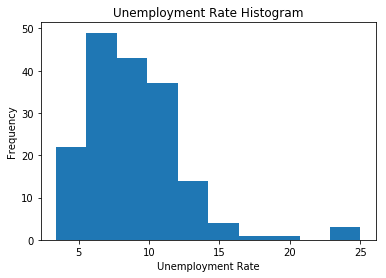

In [859]:
#n_data = len(ggu.UnemploymentRate)
#n_bins = np.sqrt(n_data)
#n_bins = int(n_bins)

# can't do histograms of counties either, too many counties 
plt.hist(ggu['UnemploymentRate'])
plt.title('Unemployment Rate Histogram')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
# right skewed distribution with a mean interval >5 and <12



# should i look into the outliers
# qq plot, residual test, normality 
# run bootstrap and hypothesis test on all features

In [860]:
ggu.UnemploymentRate.mean()

8.917241379310344

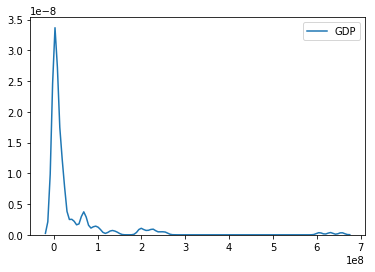

In [861]:
sns.kdeplot(ggu.GDP)

In [862]:
# n_d = len(ggu.GDPgrowth)
# n_b = np.sqrt(n_d)
# n_b = int(n_b)

# NOT USEFUL VISUALIZATION
# plt.hist(ggu['GDPgrowth'])
# plt.title('GDP Growth Histogram')
# plt.xlabel('GDP Growth Rate')
# plt.ylabel('Frequency')


In [863]:
np.mean(ggu.GDPgrowth)
# mean interval >-5 and <7

3.0419540229885054

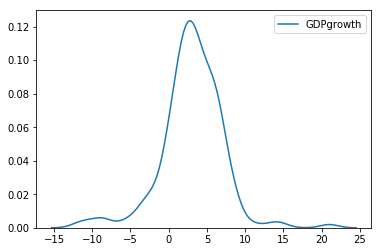

In [864]:
sns.kdeplot(ggu.GDPgrowth)
# approx. normal 

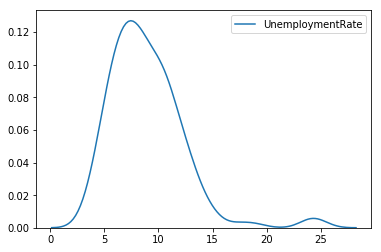

In [865]:
import seaborn as sns
sns.kdeplot(ggu.UnemploymentRate)
# right skewed

In [866]:
import scipy.stats as sy
sy.anderson(ggu.UnemploymentRate,'norm')
# reject
# do i check if the features and residuals are normally distributed

AndersonResult(statistic=2.874933829561826, critical_values=array([0.564, 0.642, 0.77 , 0.898, 1.068]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [867]:
pd.isna(ggu.GDP).sum()

0

In [868]:
igdp = ggu.GDP.astype(int)
igrowth = ggu.GDPgrowth.astype(int)
# reject

In [869]:
sy.anderson(igdp,'norm')
# reject

AndersonResult(statistic=31.91894698228765, critical_values=array([0.564, 0.642, 0.77 , 0.898, 1.068]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [870]:
sy.anderson(igrowth,'norm')
# reject
# economic factors are not all normally distributed 
# according to the anderson test,
# they all have stats > .05 critical values

AndersonResult(statistic=3.2151183710230953, critical_values=array([0.564, 0.642, 0.77 , 0.898, 1.068]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [871]:
sy.normaltest(ggu.UnemploymentRate)
# reject the null

NormaltestResult(statistic=75.64035723101034, pvalue=3.757553066602641e-17)

In [872]:
sy.normaltest(igrowth)

NormaltestResult(statistic=23.737477246867734, pvalue=7.006035098432238e-06)

In [873]:
sy.normaltest(igdp)

NormaltestResult(statistic=197.7591581186905, pvalue=1.1406290852812215e-43)

In [874]:
ggud1['Enc'] = pd.factorize(ggud1.Disease)[0]
ggud1.Enc.head()

0    0
1    0
2    0
3    1
4    1
Name: Enc, dtype: int64

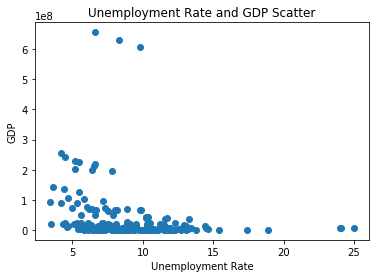

In [875]:
plt.scatter(ggu.UnemploymentRate,ggu.GDP)
plt.title('Unemployment Rate and GDP Scatter')
plt.xlabel('Unemployment Rate')
plt.ylabel('GDP')
plt.show()

In [876]:
# pearson correlation
import scipy.stats as ss
ss.pearsonr(ggu.UnemploymentRate,ggu.GDP)
# p val says to reject the null that they are correlated 

(-0.22876904405085352, 0.0023950884492341955)

In [877]:
ggu.head()

County Postal  Year       GDP GDPgrowth  UnemploymentRate
0    Alameda     CA  2013  97646410       4.1               7.2
1     Alpine     CA  2013     80465     -11.8               9.7
2     Amador     CA  2013   1155937       4.5              10.3
3      Butte     CA  2013   6647096       3.9              10.3
4  Calaveras     CA  2013    786451       1.9               9.9

In [878]:
ggu.GDPgrowth.describe()

count     174.0
unique     92.0
top         2.0
freq        6.0
Name: GDPgrowth, dtype: float64

In [879]:
ggu.UnemploymentRate.describe()

count    174.000000
mean       8.917241
std        3.473174
min        3.400000
25%        6.600000
50%        8.450000
75%       10.500000
max       25.000000
Name: UnemploymentRate, dtype: float64

In [880]:
ggud1.head()

County Postal  Year       GDP GDPgrowth  UnemploymentRate  \
0  Alameda     CA  2013  97646410       4.1               7.2   
1  Alameda     CA  2013  97646410       4.1               7.2   
2  Alameda     CA  2013  97646410       4.1               7.2   
3  Alameda     CA  2013  97646410       4.1               7.2   
4  Alameda     CA  2013  97646410       4.1               7.2   

                         Disease     Sex  Count  Population   Rate Unstable  \
0                      Amebiasis  Female      5      803669  0.622        *   
1                      Amebiasis    Male      7      772128  0.907        *   
2                      Amebiasis   Total     12     1575797  0.762        *   
3  Anaplasmosis and Ehrlichiosis    Male      0      772128  0.000        -   
4  Anaplasmosis and Ehrlichiosis   Total      0     1575797  0.000        -   

   Enc  
0    0  
1    0  
2    0  
3    1  
4    1

In [881]:
ggud1.Disease.unique()

array(['Amebiasis', 'Anaplasmosis and Ehrlichiosis', 'Anthrax',
       'Babesiosis', 'Botulism, Foodborne', 'Botulism, Other',
       'Botulism, Wound', 'Brucellosis', 'Campylobacteriosis', 'Cholera',
       'Ciguatera Fish Poisoning', 'Coccidioidomycosis',
       'Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies',
       'Cryptosporidiosis', 'Cyclosporiasis',
       'Cysticercosis or Taeniasis', 'Dengue', 'Domoic Acid Poisoning',
       'E. coli O157', 'E. coli Other STEC (non-O157)', 'Giardiasis',
       'HIV', 'Hantavirus Infection', 'Hemolytic Uremic Syndrome',
       'Hepatitis B, Chronic', 'Hepatitis C, Chronic',
       'Hepatitis E, acute infection', 'Legionellosis', 'Leprosy',
       'Leptospirosis', 'Listeriosis', 'Lyme Disease', 'Malaria',
       'Paralytic Shellfish Poisoning', 'Plague, human', 'Psittacosis',
       'Q Fever', 'Rabies, human', 'Relapsing Fever', 'Salmonellosis',
       'Scombroid Fish Poisoning',
       'Shiga Toxin Positive Fece

In [882]:
cholera = ggud1[ggud1['Disease']=='Cholera']
cholera[cholera['Count'] != 0].count()

County              0
Postal              0
Year                0
GDP                 0
GDPgrowth           0
UnemploymentRate    0
Disease             0
Sex                 0
Count               0
Population          0
Rate                0
Unstable            0
Enc                 0
dtype: int64

In [883]:
ggud2 = ggud1[ggud1['Sex']=='Total']
ggud2.head()

County Postal  Year       GDP GDPgrowth  UnemploymentRate  \
2   Alameda     CA  2013  97646410       4.1               7.2   
4   Alameda     CA  2013  97646410       4.1               7.2   
7   Alameda     CA  2013  97646410       4.1               7.2   
10  Alameda     CA  2013  97646410       4.1               7.2   
14  Alameda     CA  2013  97646410       4.1               7.2   

                          Disease    Sex  Count  Population   Rate Unstable  \
2                       Amebiasis  Total     12     1575797  0.762        *   
4   Anaplasmosis and Ehrlichiosis  Total      0     1575797  0.000        -   
7                         Anthrax  Total      0     1575797  0.000        -   
10                     Babesiosis  Total      0     1575797  0.000        -   
14            Botulism, Foodborne  Total      0     1575797  0.000        -   

    Enc  
2     0  
4     1  
7     2  
10    3  
14    4

In [884]:
ggud3 = ggud2[ggud2['Count']!= 0]
ggud3.head(20)

County Postal  Year       GDP GDPgrowth  UnemploymentRate  \
2    Alameda     CA  2013  97646410       4.1               7.2   
24   Alameda     CA  2013  97646410       4.1               7.2   
34   Alameda     CA  2013  97646410       4.1               7.2   
41   Alameda     CA  2013  97646410       4.1               7.2   
48   Alameda     CA  2013  97646410       4.1               7.2   
54   Alameda     CA  2013  97646410       4.1               7.2   
59   Alameda     CA  2013  97646410       4.1               7.2   
60   Alameda     CA  2013  97646410       4.1               7.2   
64   Alameda     CA  2013  97646410       4.1               7.2   
71   Alameda     CA  2013  97646410       4.1               7.2   
73   Alameda     CA  2013  97646410       4.1               7.2   
75   Alameda     CA  2013  97646410       4.1               7.2   
80   Alameda     CA  2013  97646410       4.1               7.2   
83   Alameda     CA  2013  97646410       4.1               7.2   
90   Alameda     CA  2013  97646410       4.1               7.2   
96   Alameda     CA  2013  97646410       4.1               7.2   
107  Alameda     CA  2013  97646410       4.1               7.2   
108  Alameda     CA  2013  97646410       4.1               7.2   
115  Alameda     CA  2013  97646410       4.1               7.2   
119  Alameda     CA  2013  97646410       4.1               7.2   

                           Disease    Sex  Count  Population    Rate Unstable  \
2                        Amebiasis  Total     12     1575797   0.762        *   
24              Campylobacteriosis  Total    409     1575797  25.955      NaN   
34              Coccidioidomycosis  Total     30     1575797   1.904      NaN   
41               Cryptosporidiosis  Total     15     1575797   0.952        *   
48                          Dengue  Total     18     1575797   1.142        *   
54                    E. coli O157  Total     26     1575797   1.650      NaN   
59   E. coli Other STEC (non-O157)  Total     14     1575797   0.888        *   
60                      Giardiasis  Total    108     1575797   6.854      NaN   
64                             HIV  Total    216     1575797  13.707      NaN   
71       Hemolytic Uremic Syndrome  Total      2     1575797   0.127        *   
73            Hepatitis B, Chronic  Total    372     1575797  23.607      NaN   
75            Hepatitis C, Chronic  Total   1043     1575797  66.189      NaN   
80    Hepatitis E, acute infection  Total      1     1575797   0.063        *   
83                   Legionellosis  Total      4     1575797   0.254        *   
90                     Listeriosis  Total      3     1575797   0.190        *   
96                         Malaria  Total     13     1575797   0.825        *   
107                    Psittacosis  Total      1     1575797   0.063        *   
108                        Q Fever  Total      1     1575797   0.063        *   
115                Relapsing Fever  Total      1     1575797   0.063        *   
119                  Salmonellosis  Total    246     1575797  15.611      NaN   

     Enc  
2      0  
24     8  
34    11  
41    13  
48    16  
54    18  
59    19  
60    20  
64    21  
71    23  
73    24  
75    25  
80    26  
83    27  
90    30  
96    32  
107   35  
108   36  
115   38  
119   39

In [885]:
hiv = ggud3[ggud3['Disease']=='HIV']
hiv.head()

# should i automate the creation of subset dataframes for each disease ???
# for d in ggud3.Disease:


# gdp growth over time and disease count over time, time series double y axis  

County Postal  Year       GDP GDPgrowth  UnemploymentRate Disease  \
64         Alameda     CA  2013  97646410       4.1               7.2     HIV   
381         Amador     CA  2013   1155937       4.5              10.3     HIV   
540          Butte     CA  2013   6647096       3.9              10.3     HIV   
700      Calaveras     CA  2013    786451       1.9               9.9     HIV   
1018  Contra Costa     CA  2013  63638925       2.4               7.5     HIV   

        Sex  Count  Population    Rate Unstable  Enc  
64    Total    216     1575797  13.707      NaN   21  
381   Total      2       37582   5.322        *   21  
540   Total      8      222229   3.600        *   21  
700   Total      3       45116   6.650        *   21  
1018  Total     73     1089656   6.699      NaN   21

In [886]:
hiv = ggud3[ggud3.Disease =='HIV']
hiv.head()

County Postal  Year       GDP GDPgrowth  UnemploymentRate Disease  \
64         Alameda     CA  2013  97646410       4.1               7.2     HIV   
381         Amador     CA  2013   1155937       4.5              10.3     HIV   
540          Butte     CA  2013   6647096       3.9              10.3     HIV   
700      Calaveras     CA  2013    786451       1.9               9.9     HIV   
1018  Contra Costa     CA  2013  63638925       2.4               7.5     HIV   

        Sex  Count  Population    Rate Unstable  Enc  
64    Total    216     1575797  13.707      NaN   21  
381   Total      2       37582   5.322        *   21  
540   Total      8      222229   3.600        *   21  
700   Total      3       45116   6.650        *   21  
1018  Total     73     1089656   6.699      NaN   21

In [887]:
ggud3[['County','Count']].head()

County  Count
2   Alameda     12
24  Alameda    409
34  Alameda     30
41  Alameda     15
48  Alameda     18

Single Instance of Stratification 

In [888]:
from scipy.stats import ttest_ind
ttest_ind(hiv[hiv['County']=='Alameda']['Count'],hiv[hiv['County']=='Humboldt']['Count'], equal_var=False)
# are the means of prevalence for these two counties the same or alternatively statistically 
# significant in their difference of means ???

# --repeated measures studies

Ttest_indResult(statistic=13.406075209104102, pvalue=0.005194692941304839)

In [889]:
hiv.loc[hiv['County'].isin(['Alameda','Humboldt']),:][['County','Count','Year']]
# hiv is a dataframe with the hiv samples
# .loc is further subsetting by county, and .isin is specifying for which counties in the column 
# parameter, the extra set of brackets captures the list of desired columns 

# to-do: iterate through combinations of counties testing for a statistical difference of means
# and making sure to capture the identity of each tuple combination 

County  Count  Year
64      Alameda    216  2013
1812   Humboldt      4  2013
9286    Alameda    208  2014
11036  Humboldt      6  2014
18509   Alameda    261  2015
20257  Humboldt      9  2015

In [890]:
ld = ggud3[ggud3.Disease =='Lyme Disease'].count()
ld

County              82
Postal              82
Year                82
GDP                 82
GDPgrowth           82
UnemploymentRate    82
Disease             82
Sex                 82
Count               82
Population          82
Rate                82
Unstable            81
Enc                 82
dtype: int64

In [891]:
ggudnew = ggud1[ggud1['Sex']!='Total']
ggudnew.head()

County Postal  Year       GDP GDPgrowth  UnemploymentRate  \
0  Alameda     CA  2013  97646410       4.1               7.2   
1  Alameda     CA  2013  97646410       4.1               7.2   
3  Alameda     CA  2013  97646410       4.1               7.2   
5  Alameda     CA  2013  97646410       4.1               7.2   
6  Alameda     CA  2013  97646410       4.1               7.2   

                         Disease     Sex  Count  Population   Rate Unstable  \
0                      Amebiasis  Female      5      803669  0.622        *   
1                      Amebiasis    Male      7      772128  0.907        *   
3  Anaplasmosis and Ehrlichiosis    Male      0      772128  0.000        -   
5  Anaplasmosis and Ehrlichiosis  Female      0      803669  0.000        -   
6                        Anthrax    Male      0      772128  0.000        -   

   Enc  
0    0  
1    0  
3    1  
5    1  
6    2

In [892]:
groups = ggud3.groupby('Disease')
groups.get_group('Amebiasis').head()

County Postal  Year        GDP GDPgrowth  UnemploymentRate  \
2          Alameda     CA  2013   97646410       4.1               7.2   
478          Butte     CA  2013    6647096       3.9              10.3   
956   Contra Costa     CA  2013   63638925       2.4               7.5   
2863   Los Angeles     CA  2013  605923302       2.1               9.8   
3182         Marin     CA  2013   18144438       1.2               5.2   

        Disease    Sex  Count  Population   Rate Unstable  Enc  
2     Amebiasis  Total     12     1575797  0.762        *    0  
478   Amebiasis  Total      3      222229  1.350        *    0  
956   Amebiasis  Total     13     1089656  1.193        *    0  
2863  Amebiasis  Total     79    10055477  0.786      NaN    0  
3182  Amebiasis  Total      2      258569  0.773        *    0

In [893]:
essl = ggud3[['Year','County','Disease','Count']]
grp = essl.groupby(['County','Year'])
pd_ls = []
for i,g in grp:
    a_ = pd.DataFrame(g)
    pd_ls.append(a_)
#    print(i)
#    print(g)

# group values of disease column by values of county column
# the result has count 

In [894]:
essl.head(15)

Year   County                        Disease  Count
2   2013  Alameda                      Amebiasis     12
24  2013  Alameda             Campylobacteriosis    409
34  2013  Alameda             Coccidioidomycosis     30
41  2013  Alameda              Cryptosporidiosis     15
48  2013  Alameda                         Dengue     18
54  2013  Alameda                   E. coli O157     26
59  2013  Alameda  E. coli Other STEC (non-O157)     14
60  2013  Alameda                     Giardiasis    108
64  2013  Alameda                            HIV    216
71  2013  Alameda      Hemolytic Uremic Syndrome      2
73  2013  Alameda           Hepatitis B, Chronic    372
75  2013  Alameda           Hepatitis C, Chronic   1043
80  2013  Alameda   Hepatitis E, acute infection      1
83  2013  Alameda                  Legionellosis      4
90  2013  Alameda                    Listeriosis      3

In [895]:
pd_ls

[     Year   County                                            Disease  Count
 2    2013  Alameda                                          Amebiasis     12
 24   2013  Alameda                                 Campylobacteriosis    409
 34   2013  Alameda                                 Coccidioidomycosis     30
 41   2013  Alameda                                  Cryptosporidiosis     15
 48   2013  Alameda                                             Dengue     18
 54   2013  Alameda                                       E. coli O157     26
 59   2013  Alameda                      E. coli Other STEC (non-O157)     14
 60   2013  Alameda                                         Giardiasis    108
 64   2013  Alameda                                                HIV    216
 71   2013  Alameda                          Hemolytic Uremic Syndrome      2
 73   2013  Alameda                               Hepatitis B, Chronic    372
 75   2013  Alameda                               Hepatitis C, C

In [896]:
d = ggud3.Year[ggud3['Disease'] == 'Amebiasis']

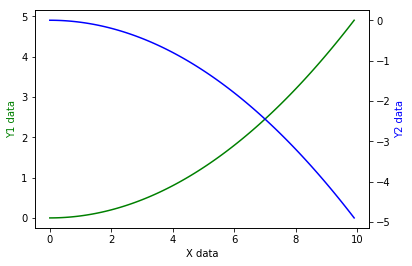

In [897]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()

In [898]:
# t.head(10)
# too many year values, should have less, there are duplicates because of the county column

In [899]:
# always think and remember to watch out for duplicate rows, especially with
# times series before plotting data
groups

In [900]:
# groups = ggud3.groupby('Disease')
# groups.get_group('Amebiasis').head()

In [901]:
ggu.head()

County Postal  Year       GDP GDPgrowth  UnemploymentRate
0    Alameda     CA  2013  97646410       4.1               7.2
1     Alpine     CA  2013     80465     -11.8               9.7
2     Amador     CA  2013   1155937       4.5              10.3
3      Butte     CA  2013   6647096       3.9              10.3
4  Calaveras     CA  2013    786451       1.9               9.9

In [902]:
gps = ggu.groupby('County')
al = gps.get_group('Alameda')
al

County Postal  Year        GDP GDPgrowth  UnemploymentRate
0    Alameda     CA  2013   97646410       4.1               7.2
58   Alameda     CA  2014  102214628       4.7               5.8
116  Alameda     CA  2015  106058748       3.8               4.7

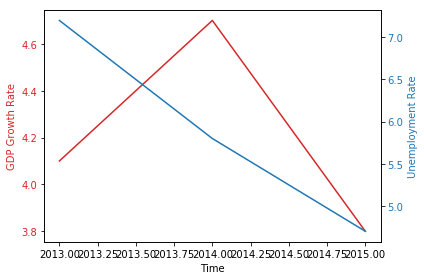

In [903]:
import numpy as np
import matplotlib.pyplot as plt

t = al.Year
data1 = al.GDPgrowth
data2 = al.UnemploymentRate

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('GDP Growth Rate', color=color)
ax1.plot(t,data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Unemployment Rate', color=color)  # we already handled the x-label with ax1
ax2.plot(t,data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)# right here, check this 

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [905]:
# why is the x axis incremented in quarters?

# would like to turn all diseases into binary features: done
# compare distributions for a single disease between two counties: done
# time series isn't an option, only three periods: work with just disease data, 15 years 
# only option is to compare sum of counts and compare uniqueness of diseases between counties
# check gdp growth and unemployment levels corresponding to some county disease profile 
# identify an economic trend for some disease profile such as when there exists 
# a relatively large number of diseases in some county 

# binary features on the axis, county on the y axis

# neighbor variable
# track more county level features



# bootstrap, hyp test, contingency table